<a href="https://colab.research.google.com/github/JaySampat/DataScienceProjectsNew/blob/master/SPAC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPAC Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot


In [ ]:
xls = pd.ExcelFile('SPAC-Mar2021.xlsx')
df1 = pd.read_excel(xls, 'SPACS')
df2 = pd.read_excel(xls, 'SPAC Types')
df3 = pd.read_excel(xls, 'SeekingTgt') # Seeking Target
df4 = pd.read_excel(xls, 'AnnouncedTgt')  # Announced Target

In [ ]:
pd.options.display.max_columns=50

In [ ]:
df1.head()

,Year,IPO Count,Gross Proceeds(mms),Average IPO Size(mms)
0,2009,1,36.0,36.0
1,2010,7,502.6,71.8
2,2011,15,1081.5,72.1
3,2012,9,490.5,54.5
4,2013,10,1455.3,145.5


In [ ]:
display(df1.head())
display(df1.tail())

,Year,IPO Count,Gross Proceeds(mms),Average IPO Size(mms)
0,2009,1,36.0,36.0
1,2010,7,502.6,71.8
2,2011,15,1081.5,72.1
3,2012,9,490.5,54.5
4,2013,10,1455.3,145.5


,Year,IPO Count,Gross Proceeds(mms),Average IPO Size(mms)
8,2017,34,10048.5,295.5
9,2018,46,10751.9,233.7
10,2019,59,13600.3,230.5
11,2020,248,83042.2,334.8
12,2021,28,6854.3,244.8


# Seeking Targets

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Date of IPO                             368 non-null    datetime64[ns]
 1   Name                                    368 non-null    object        
 2   Symbol                                  368 non-null    object        
 3   ROI                                     368 non-null    float64       
 4   var 2                                   368 non-null    float64       
 5   ARR                                     368 non-null    float64       
 6   heldintrustperunit                      368 non-null    float64       
 7   heldintrust                             368 non-null    float64       
 8   monthstocomplete                        368 non-null    int64         
 9   warrantsinclinunit                      368 non-null  

In [ ]:
df3.columns

Index(['Date of IPO', 'Name', 'Symbol', 'ROI', 'var 2', 'ARR',
       'heldintrustperunit', 'heldintrust', 'monthstocomplete',
       'warrantsinclinunit', 'warrant', 'rights', 'unit', 'Total Amount',
       'impliedenterprisevalue', 'right', 'underwriter', 'additionalterms',
       'lawyerissuerscounsel', 'underwritercounsel', 'comanagers', 'industry',
       'cashorcashlessredemption', 'feesupfrontdeferred',
       'businesscombinationrecorddate',
       'businesscombinationshareholdervotedate', 'ending_trust_ball',
       'implied_cash_per_share', 'completiondeadlinedate',
       'singlespacsharetext', 'singlespacexerciseprice',
       'singlespacredemptionprice', 'completedsymbolwarrant',
       'completedsymbolcommon'],
      dtype='object')

In [ ]:
df3.Name.nunique()

368

In [ ]:
df3.industry.nunique()

149

In [ ]:
df3.industry.iloc[1:10,]

1                  General/Broad
2    Restaurants - North America
3                      Tech Asia
4                     Technology
5                    Real Estate
6                 Sustainability
7                     Technology
8                       Cannabis
9                         Sports
Name: industry, dtype: object

In [ ]:
df3[df3['industry']=='TMT'].Name.count()

15

In [ ]:
df3[df3['industry']=='AI'].Name.count()

0

In [ ]:
df3[df3['industry'].str.contains ('tech')].Name.count()

19

In [ ]:
df3[df3['industry'].str.contains ('General')].Name.count()

64

In [ ]:
df3[df3['industry'].str.contains ('TMT')]


,Date of IPO,Name,Symbol,ROI,var 2,ARR,heldintrustperunit,heldintrust,monthstocomplete,warrantsinclinunit,warrant,rights,unit,Total Amount,impliedenterprisevalue,right,underwriter,additionalterms,lawyerissuerscounsel,underwritercounsel,comanagers,industry,cashorcashlessredemption,feesupfrontdeferred,businesscombinationrecorddate,businesscombinationshareholdervotedate,ending_trust_ball,implied_cash_per_share,completiondeadlinedate,singlespacsharetext,singlespacexerciseprice,singlespacredemptionprice,completedsymbolwarrant,completedsymbolcommon
19,2021-02-09,Progress Acquisition Corp.,PGRW,0.0,52.08,0.0,10.00,100.0,21,1/2,PGRWW,NaN,PGRWU,150.00,0,NaN,"EarlyBirdCapital, Inc.",1. Crescent Term: $9.20 2. Limitation on redem...,Ellenoff Grossman & Schole LLP,Graubard Miller,NaN,TMT,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,150002774,10.00,2022-11-12,1 Class A Common Stock,11.5,Cash/Cashless: $21.00,NaN,NaN
25,2021-02-09,"GigCapital4, Inc.",GIG,0.0,52.08,0.0,10.00,100.0,24,1/3,GIGGW,NaN,GIGGU,312.00,0,NaN,"Oppenheimer, Nomura",1. Crescent term: $9.20 2. Limitation on redem...,DLA Piper LLP,Ellenoff Grossman & Schole LLP,NaN,TMT,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,312005770,10.00,2023-02-11,1 Share Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN
56,2021-01-29,BlueRiver Acquisition Corp.,BLUA,0.0,182.50,0.0,10.00,100.0,24,1/3,BLUA.WS,NaN,BLUA.U,250.00,0,NaN,Goldman Sachs,1. Crescent term: $9.20 2. Limitation on redem...,Goodwin Procter LLP,"Skadden, Arps, Slate, Meagher & Flom LLP",NaN,TMT,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,250002055,10.00,2023-02-02,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
79,2021-01-22,Liberty Media Acquisition Corp.,LMACA,0.0,40.56,0.0,10.00,100.0,24,1/5,LMACW,NaN,LMACU,575.00,0,NaN,"Citigroup, Morgan Stanley, Credit Suisse, Gold...",1. Crescent Term: $9.20 2. Limitation on redem...,"Skadden, Arps, Slate, Meagher & Flom LLP",Ropes & Gray LLP,NaN,TMT,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,575015950,10.00,2023-01-26,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
102,2021-01-14,Monument Circle Acquisition Corp.,MON,0.0,182.50,0.0,10.00,100.0,24,1/2,MONCW,NaN,MONCU,218.00,0,NaN,"Cantor Fitzgerald, Moelis & Company",1. Crescent Term: $9.20 2. Limitation on redem...,"Paul, Weiss, Rifkind, Wharton & Garrison LLP",Ellenoff Grossman & Schole LLP,NaN,TMT,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,218001344,10.00,2023-01-18,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN
114,2021-01-12,"890 5th Avenue Partners, Inc.",ENFA,0.0,91.25,0.0,10.00,100.0,24,1/3,ENFAW,NaN,ENFAU,278.75,0,NaN,"Cowen, Craig-Hallum Capital Group",1. Crescent term: $9.20 2. Limitation on redem...,BraunHagey & Borden LLP,"Greenberg Traurig, LLP",NaN,TMT,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,278753437,10.00,2023-01-14,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
153,2020-12-18,Golden Falcon Acquisition Corp.,GFX,0.0,15.21,0.0,10.00,100.0,24,1/2,GFX.WS,NaN,GFX.U,345.00,0,NaN,"UBS Securities, Moelis",1. Crescent term: $9.20 2. Limitation on redem...,"Greenberg Traurig, LLP",Graubard Miller,"EarlyBirdCapital, Inc.","TMT, Fintech",Mgmt's Discretion,2.0%/3.5%,NaN,NaN,345025521,10.00,2022-12-22,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
160,2020-12-15,Americas Technology Acquisition Corp.,ATA,0.0,13.52,0.0,10.10,101.0,12,1/2,ATA.WS,NaN,ATA.U,115.00,0,NaN,"EarlyBirdCapital, Inc.",1. Crescent term: $9.20 2. Limitation on redem...,Ellenoff Grossman & Schole LLP,Graubard Miller,NaN,TMT,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,116162888,10.10,2021-12-17,1 Ordinary Share,11.5,Cash/Cashless: $18.00,NaN,NaN
161,2020-12-15,Marquee Raine Acquisition Corp.,MRAC,0.0,13.52,0.0,10.00,100.0,24,1/4,MRACW,NaN,MRACU,373.75,0,NaN,Credit Suisse,1. Crescent Term: $9.20 2. Limitation on redem...,"Weil, Gotshal & Manges LLP",Davis Polk & Wardwell LLP,NaN,TMT,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,373791471,10.00,2022-12-17,1 Class A Ordinary Share,11.5,Cash/Cash

In [ ]:
df3[df3['industry'].str.contains ('Tech')]

,Date of IPO,Name,Symbol,ROI,var 2,ARR,heldintrustperunit,heldintrust,monthstocomplete,warrantsinclinunit,warrant,rights,unit,Total Amount,impliedenterprisevalue,right,underwriter,additionalterms,lawyerissuerscounsel,underwritercounsel,comanagers,industry,cashorcashlessredemption,feesupfrontdeferred,businesscombinationrecorddate,businesscombinationshareholdervotedate,ending_trust_ball,implied_cash_per_share,completiondeadlinedate,singlespacsharetext,singlespacexerciseprice,singlespacredemptionprice,completedsymbolwarrant,completedsymbolcommon
3,2021-02-12,Catcha Investment Corp,CHAA,0.0,90.91,0.0,10.0,100.0,24,1/3,CHAA.WS,NaN,CHAA.U,275.00,0,NaN,J.P. Morgan,1. Crescent Term: $9.20 2. Limitation on redem...,Kirkland & Ellis LLP,"Skadden, Arps, Slate, Meagher & Flom LLP",NaN,Tech Asia,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,275003390,10.00,2023-02-16,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
4,2021-02-12,Social Leverage Acquisition Corp I,SLAC,0.0,90.91,0.0,10.0,100.0,24,1/4,SLAC.WS,NaN,SLAC.U,300.00,0,NaN,"Barclays, BofA Securities",1. Crescent term: $9.20 2. Limitation on redem...,"Skadden, Arps, Slate, Meagher & Flom LLP",Sidley Austin LLP,NaN,Technology,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,300002774,10.00,2023-02-16,1 Class A Common Stock,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
7,2021-02-12,Rosecliff Acquisition Corp I,RCLF,0.0,90.91,0.0,10.0,100.0,24,1/3,RCLFW,NaN,RCLFU,220.00,0,NaN,BTIG,1. Crescent Term: $9.20 2. Limitation on redem...,"Skadden, Arps, Slate, Meagher & Flom LLP",Ellenoff Grossman & Schole LLP,NaN,Technology,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,220002034,10.00,2023-02-16,1 Class A Common Stock,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
10,2021-02-11,ION Acquisition Corp 2 Ltd.,IACB,0.0,72.99,0.0,10.0,100.0,24,1/8,IACB.WS,NaN,IACB.U,220.00,0,NaN,"Goldman Sachs, Morgan Stanley",1. Crescent term: $9.20 threshold 2. Limitatio...,White & Case LLP,"Greenberg Traurig, LLP",AmeriVet Securities,Israeli Tech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,220003616,10.00,2023-02-15,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
12,2021-02-10,Foresight Acquisition Corp.,FORE,0.0,60.98,0.0,10.0,100.0,24,1/3,FOREW,NaN,FOREU,275.00,0,NaN,Cowen,1. Crescent Term: $9.20 2. Limitation on redem...,"Greenberg Traurig, LLP",Nelson Mullins Riley & Scarborough LLP,NaN,Consumer Tech / Consumer Healthcare,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,275004238,10.00,2023-02-12,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,2020-07-14,Artius Acquisition Inc.,AACQ,11.9,2.02,25.4,10.0,100.0,24,1/3,AACQW,NaN,AACQU,724.50,0,NaN,"Credit Suisse, Goldman Sachs",1. Crescent Term: $9.20 threshold 2. Limitatio...,Cleary Gottlieb Steen & Hamilton LLP,"Skadden, Arps, Slate, Meagher & Flom LLP",NaN,Tech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,724884792,10.01,2022-07-16,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
334,2020-07-13,PTK Acquisition Corporation,PTK,14.6,2.01,31.4,10.0,100.0,18,1 for 3/4,PTK.WS,NaN,PTK.U,115.00,0,NaN,Chardan,1. Crescent Term: $9.50 threshold 2. $10M Indi...,Goodwin Procter LLP,Ropes & Gray LLP,NaN,High-Tech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,115039646,10.00,2022-01-14,1 Share Common Stock,11.5,Cash/Cashless: $16.50,NaN,NaN
339,2020-06-24,Brilliant Acquisition Corporation,BRLI,13.0,1.82,24.7,10.0,100.0,12,1,BRLIW,1 for 1/10,BRLIU,46.00,0,BRLIR,"EarlyBirdCapital, Inc.",1. Crescent Term: $9.20 threshold,Raiti PLLC,Graubard Miller,I-Bankers,"FinTech, Biz Process",Mgmt's Discretion,3.5%/3.5%,NaN,NaN,46021366,10.00,2021-06-29,1 Ordinary Share,11.5,Cash/Cashless: $16.50,NaN,NaN
354,2019-11-19,GreenVision Acquisition Corporation *,GRNV,14.8,0.87,12.8,10.0,100.0,12,1,GRNVW,1 for 1/10,GRNVU,57.50,0,GRNVR,I-Bankers,1. Sponsor will contribute $0.10 per share to ...,Becker & Poliakoff

In [ ]:
df3[df3['industry'].str.contains ('tech')]

,Date of IPO,Name,Symbol,ROI,var 2,ARR,heldintrustperunit,heldintrust,monthstocomplete,warrantsinclinunit,warrant,rights,unit,Total Amount,impliedenterprisevalue,right,underwriter,additionalterms,lawyerissuerscounsel,underwritercounsel,comanagers,industry,cashorcashlessredemption,feesupfrontdeferred,businesscombinationrecorddate,businesscombinationshareholdervotedate,ending_trust_ball,implied_cash_per_share,completiondeadlinedate,singlespacsharetext,singlespacexerciseprice,singlespacredemptionprice,completedsymbolwarrant,completedsymbolcommon
69,2021-01-26,Biotech Acquisition Company,BIOT,0.0,73.00,0.0,10.0,100.0,24,1/2,BIOTW,NaN,BIOTU,230.00,0,NaN,Cantor,1. Crescent term: $9.20 2. Limitation on redem...,Ellenoff Grossman & Schole LLP,Reed Smith LLP,NaN,Biotech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,230004726,10.00,2023-01-28,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00,NaN,NaN
86,2021-01-20,FoxWayne Enterprises Acquisition Corp.,FOXW,0.0,33.18,0.0,10.1,101.0,12,1,FOXWW,NaN,FOXWU,57.50,0,NaN,Kingswood,1. Crescent Term: $9.20 2. Limitation on redem...,"Sheppard, Mullin, Richter & Hampton LLP",Ellenoff Grossman & Schole LLP,NaN,Biotech / Healthcare,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,58076969,10.10,2022-01-22,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN
98,2021-01-15,Edify Acquisition Corp.,EAC,0.0,365.00,0.0,10.0,100.0,24,1/2,EACPW,NaN,EACPU,240.00,0,NaN,"BMO Capital Markets, B. Riley Securities",1. Crescent Term: $9.20 2. Limitation on redem...,Loeb & Loeb LLP,White & Case LLP,NaN,Education/Edtech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,240000740,10.00,2023-01-19,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN
153,2020-12-18,Golden Falcon Acquisition Corp.,GFX,0.0,15.21,0.0,10.0,100.0,24,1/2,GFX.WS,NaN,GFX.U,345.00,0,NaN,"UBS Securities, Moelis",1. Crescent term: $9.20 2. Limitation on redem...,"Greenberg Traurig, LLP",Graubard Miller,"EarlyBirdCapital, Inc.","TMT, Fintech",Mgmt's Discretion,2.0%/3.5%,NaN,NaN,345025521,10.00,2022-12-22,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
178,2020-12-08,Concord Acquisition Corp.,CND,0.0,10.74,0.0,10.0,100.0,18,1/2,CND.WS,NaN,CND.U,276.00,0,NaN,Cowen and Company,1. Crescent term: $9.20 2. Limitation on redem...,"Greenberg Traurig, LLP",White & Case LLP,Amerivet Securities,Fintech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,276028923,10.00,2022-06-10,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
182,2020-12-04,Fintech Acquisition Corp. V,FTCV,0.0,9.61,0.0,10.0,100.0,24,1/3,FTCVW,NaN,FTCVU,250.00,0,NaN,Cantor Fitzgerald,1. Crescent Term: $9.20 2. Limitation on redem...,Ledgewood PC,Ellenoff Grossman & Schole LLP,NaN,Fintech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,250029281,10.00,2022-12-08,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN
204,2020-11-19,Consonance-HFW Acquisition Corporation,CHFW,0.0,6.89,0.0,10.0,100.0,24,1/3,CHFW.WS,NaN,CHFW.U,80.00,0,NaN,J.P. Morgan,1. Crescent Term: $9.20 2. Limitation on redem...,Goodwin Procter LLP,Davis Polk & Wardwell LLP,NaN,Biotech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,80017425,10.00,2022-11-23,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
206,2020-11-19,Jiya Acquisition Corp.,JYAC,3.5,6.89,26.7,10.0,100.0,24,None,---,NaN,---,103.52,0,NaN,Citigroup,1. Limitation on redemption rights: 15% 2. For...,Davis Polk & Wardwell LLP,Ropes & Gray LLP,NaN,Biotech,NaN,2.0%/3.5%,NaN,NaN,103537311,10.00,2022-11-23,1 Share Class A Common Stock,0.0,NaN,NaN,NaN
226,2020-10-28,Ajax I,AJAX,21.8,4.87,160.6,10.0,100.0,24,1/4,AJAX.WS,NaN,AJAX.U,750.00,0,NaN,"Goldman Sachs, Citigroup, J.P. Morgan",1. Crescent Term: $9.20 2. Limitation on redem...,"Skadden, Arps, Slate, Meagher & Flom LLP",Ropes & Gray LLP,"PJT Partners, LionTree Advisors","Tech, Fintech, Consumer",Mgmt's Discretion,2.0%/3.5%,NaN,NaN,750231164,10.00,2022-10-30,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
248,2020-10-16,Turmeric Acquisition Corpo

In [ ]:
#df3[df3['industry'].str.contains ( 'Software','Digital', 'Cyber Security', 'Data')]
df3[df3['industry'].str.contains ( 'Software','Digital')]

,Date of IPO,Name,Symbol,ROI,var 2,ARR,heldintrustperunit,heldintrust,monthstocomplete,warrantsinclinunit,warrant,rights,unit,Total Amount,impliedenterprisevalue,right,underwriter,additionalterms,lawyerissuerscounsel,underwritercounsel,comanagers,industry,cashorcashlessredemption,feesupfrontdeferred,businesscombinationrecorddate,businesscombinationshareholdervotedate,ending_trust_ball,implied_cash_per_share,completiondeadlinedate,singlespacsharetext,singlespacexerciseprice,singlespacredemptionprice,completedsymbolwarrant,completedsymbolcommon
99,2021-01-15,Thoma Bravo Advantage,TBA,0.0,365.00,0.0,10.0,100.0,24,1/5,---,NaN,---,900.00,0,NaN,"Citigroup, Deutsche Bank, Goldman Sachs, Credi...",1. Crescent term: $9.20 2. Limitation on redem...,"Cadwalader, Wickersham & Taft LLP",Latham & Watkins LLP,NaN,Software,NaN,2.0%/3.5%,NaN,NaN,900003699,10.00,2023-01-19,1 Class A Ordinary Share,0.0,NaN,NaN,NaN
119,2021-01-08,LightJump Acquisition Corporation,LJAQ,0.0,121.67,0.0,10.0,100.0,18,1/2,LJAQW,NaN,LJAQU,120.00,0,NaN,"EarlyBirdCapital, Inc.",1. Crescent Term: $9.20 2. Limitation on redem...,K&L Gates LLP,Graubard Miller,NaN,"Tech, Software",Mgmt's Discretion,2.0%/3.5%,NaN,NaN,120001110,10.00,2022-07-13,1 Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN
130,2021-01-07,KludeIn I Acquisition Corp.,INKA,0.0,91.25,0.0,10.0,100.0,18,1/2,INKAW,NaN,INKAU,150.00,0,NaN,BTIG,1. Crescent term: $9.20 2. Limitation on redem...,Ellenoff Grossman & Schole LLP,White & Case LLP,I-Bankers,"Tech, Software",Mgmt's Discretion,2.0%/3.5%,NaN,NaN,150001849,10.00,2022-07-12,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN
141,2021-01-05,Crucible Acquisition Corporation,CRU,0.0,60.83,0.0,10.0,100.0,24,1/3,CRU.WS,NaN,CRU.U,258.75,0,NaN,Credit Suisse,1. Crescent Term: $9.20 2. Limitation on redem...,"Skadden, Arps, Slate, Meagher & Flom LLP","Paul, Weiss, Rifkind, Wharton & Garrison LLP",NaN,"Tech, Software",Mgmt's Discretion,2.0%/3.5%,NaN,NaN,258754785,10.00,2023-01-07,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
150,2020-12-18,Dune Acquisition Corporation,DUNE,0.0,15.21,0.0,10.0,100.0,18,1/2,DUNEW,NaN,DUNEU,172.50,0,NaN,Cantor Fitzgerald,1. Crescent Term: $9.20 2. Limitation on redem...,White & Case LLP,Ellenoff Grossman & Schole LLP,Needham & Company,Software,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,172512760,10.00,2022-06-22,1 Class A Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN
185,2020-12-03,Highland Transcend Partners I Corp.,HTPA,0.0,9.36,0.0,10.0,100.0,24,1/3,HTPA.WS,NaN,HTPA.U,275.00,0,NaN,"Goldman Sachs, J.P. Morgan",1. Crescent term: $9.20 threshold 2. Limitatio...,Davis Polk & Wardwell LLP,Ropes & Gray LLP,NaN,Digital Media/ Software,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,275044075,10.00,2022-12-07,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
190,2020-12-02,Trepont Acquisition Corp I,TACA,0.0,9.13,0.0,10.1,101.0,18,1/2,TACA.WS,NaN,TACA.U,230.00,0,NaN,Credit Suisse,1. Crescent term: $9.20 2. Limitation on redem...,Davis Polk & Wardwell LLP,"Paul, Weiss, Rifkind, Wharton & Garrison LLP",NaN,"Software, Tech",Mgmt's Discretion,2.0%/3.5%,NaN,NaN,232338186,10.10,2022-06-04,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
289,2020-09-15,Software Acquisition Group Inc. II,SAII,8.5,3.09,28.7,10.0,100.0,18,1/2,SAIIW,NaN,SAIIU,172.50,0,NaN,B. Riley,1. Crescent Term: $9.20 threshold 2. Limitatio...,Ellenoff Grossman & Schole LLP,Kirkland & Ellis LLP,NaN,Software,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,172555115,10.00,2022-03-19,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN
323,2020-07-31,E.Merge Technology Acquisition Corporation,ETAC,10.6,2.23,25.1,10.0,100.0,24,1/3,ETACW,NaN,ETACU,600.00,0,NaN,"Cantor Fitzgerald, Mizuho",1. Crescent Term: $9.20 threshold 2. Limit on ...,Ellenoff Grossman & Schole LLP,Graubard Miller,NaN,Software/ Tech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,600233140,10.00,2022-08-04,1 Class A Common Stock,11.5,Cash/Cashless: $18.00,NaN

In [ ]:
df3[df3['industry'].str.contains ( 'Cyber Security')]

,Date of IPO,Name,Symbol,ROI,var 2,ARR,heldintrustperunit,heldintrust,monthstocomplete,warrantsinclinunit,warrant,rights,unit,Total Amount,impliedenterprisevalue,right,underwriter,additionalterms,lawyerissuerscounsel,underwritercounsel,comanagers,industry,cashorcashlessredemption,feesupfrontdeferred,businesscombinationrecorddate,businesscombinationshareholdervotedate,ending_trust_ball,implied_cash_per_share,completiondeadlinedate,singlespacsharetext,singlespacexerciseprice,singlespacredemptionprice,completedsymbolwarrant,completedsymbolcommon
349,2020-01-24,SCVX Corporation,SCVX,13.1,1.03,13.5,10.0,100.0,24,1/2,SCVX.WS,NaN,SCVX.U,230.0,0,NaN,Credit Suisse,1. Crescent Term: $9.20 Threshold 2. Limitatio...,"Skadden, Arps, Slate, Meagher & Flom LLP",Shearman & Sterling LLP,NaN,Cyber Security,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,230642128,10.03,2022-01-28,1 Class A Ordinary Share,11.5,$18.00 for cash/cashless,NaN,NaN


In [ ]:
df3[df3['industry'].str.contains ('Data')]

,Date of IPO,Name,Symbol,ROI,var 2,ARR,heldintrustperunit,heldintrust,monthstocomplete,warrantsinclinunit,warrant,rights,unit,Total Amount,impliedenterprisevalue,right,underwriter,additionalterms,lawyerissuerscounsel,underwritercounsel,comanagers,industry,cashorcashlessredemption,feesupfrontdeferred,businesscombinationrecorddate,businesscombinationshareholdervotedate,ending_trust_ball,implied_cash_per_share,completiondeadlinedate,singlespacsharetext,singlespacexerciseprice,singlespacredemptionprice,completedsymbolwarrant,completedsymbolcommon
199,2020-11-20,Aequi Acquisition Corporation,ARBG,0.0,7.02,0.0,10.0,100.0,24,1/3,ARBGW,NaN,ARBGU,230.0,0,NaN,"RBC Capital Markets, BofA Securities, Inc.",1. Crescent Term: $9.20 2. Limitation on redem...,Ellenoff Grossman & Schole LLP,"Skadden, Arps, Slate, Meagher & Flom LLP","Ramirez & Co., Inc., Siebert Williams Shank",Data,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,230036863,10.0,2022-11-24,1 Class A Common Stock,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
295,2020-09-10,Prime Impact Acquisition I,PIAI,7.6,2.97,24.4,10.0,100.0,24,1/3,PIAI.WS,NaN,PIAI.U,323.6,0,NaN,"Goldman Sachs, BofA Securities, Inc.",1. Crescent Term: $9.20 threshold 2. Limitatio...,Goodwin Procter LLP,Davis Polk & Wardwell LLP,NaN,Data-Centric,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,323731455,10.0,2022-09-14,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN


In [ ]:
df3[df3['industry'].str.contains ('ICT')]

,Date of IPO,Name,Symbol,ROI,var 2,ARR,heldintrustperunit,heldintrust,monthstocomplete,warrantsinclinunit,warrant,rights,unit,Total Amount,impliedenterprisevalue,right,underwriter,additionalterms,lawyerissuerscounsel,underwritercounsel,comanagers,industry,cashorcashlessredemption,feesupfrontdeferred,businesscombinationrecorddate,businesscombinationshareholdervotedate,ending_trust_ball,implied_cash_per_share,completiondeadlinedate,singlespacsharetext,singlespacexerciseprice,singlespacredemptionprice,completedsymbolwarrant,completedsymbolcommon
234,2020-10-22,Cerberus Telecom Acquisition Corporation,CTAC,8.4,4.51,43.6,10.0,100.0,24,1/3,CTAC.WS,NaN,CTAC.U,259.35,0,NaN,"Morgan Stanley, Deutsche Bank",1. Crescent term: $9.20 2. Limitation on redem...,Kirkland & Ellis LLP,Ropes & Gray LLP,NaN,ICT,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,259438712,10.0,2022-10-26,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN


In [ ]:
df3[df3['industry'].str.contains ('IT')]

,Date of IPO,Name,Symbol,ROI,var 2,ARR,heldintrustperunit,heldintrust,monthstocomplete,warrantsinclinunit,warrant,rights,unit,Total Amount,impliedenterprisevalue,right,underwriter,additionalterms,lawyerissuerscounsel,underwritercounsel,comanagers,industry,cashorcashlessredemption,feesupfrontdeferred,businesscombinationrecorddate,businesscombinationshareholdervotedate,ending_trust_ball,implied_cash_per_share,completiondeadlinedate,singlespacsharetext,singlespacexerciseprice,singlespacredemptionprice,completedsymbolwarrant,completedsymbolcommon


In [ ]:
#df[df['A'].str.contains("hello")]

In [ ]:
df3[df3.industry.isin(['Fintech','Biotech'])]

,Date of IPO,Name,Symbol,ROI,var 2,ARR,heldintrustperunit,heldintrust,monthstocomplete,warrantsinclinunit,warrant,rights,unit,Total Amount,impliedenterprisevalue,right,underwriter,additionalterms,lawyerissuerscounsel,underwritercounsel,comanagers,industry,cashorcashlessredemption,feesupfrontdeferred,businesscombinationrecorddate,businesscombinationshareholdervotedate,ending_trust_ball,implied_cash_per_share,completiondeadlinedate,singlespacsharetext,singlespacexerciseprice,singlespacredemptionprice,completedsymbolwarrant,completedsymbolcommon
69,2021-01-26,Biotech Acquisition Company,BIOT,0.0,73.00,0.0,10.0,100.0,24,1/2,BIOTW,NaN,BIOTU,230.00,0,NaN,Cantor,1. Crescent term: $9.20 2. Limitation on redem...,Ellenoff Grossman & Schole LLP,Reed Smith LLP,NaN,Biotech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,230004726,10.00,2023-01-28,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00,NaN,NaN
178,2020-12-08,Concord Acquisition Corp.,CND,0.0,10.74,0.0,10.0,100.0,18,1/2,CND.WS,NaN,CND.U,276.00,0,NaN,Cowen and Company,1. Crescent term: $9.20 2. Limitation on redem...,"Greenberg Traurig, LLP",White & Case LLP,Amerivet Securities,Fintech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,276028923,10.00,2022-06-10,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
182,2020-12-04,Fintech Acquisition Corp. V,FTCV,0.0,9.61,0.0,10.0,100.0,24,1/3,FTCVW,NaN,FTCVU,250.00,0,NaN,Cantor Fitzgerald,1. Crescent Term: $9.20 2. Limitation on redem...,Ledgewood PC,Ellenoff Grossman & Schole LLP,NaN,Fintech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,250029281,10.00,2022-12-08,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN
204,2020-11-19,Consonance-HFW Acquisition Corporation,CHFW,0.0,6.89,0.0,10.0,100.0,24,1/3,CHFW.WS,NaN,CHFW.U,80.00,0,NaN,J.P. Morgan,1. Crescent Term: $9.20 2. Limitation on redem...,Goodwin Procter LLP,Davis Polk & Wardwell LLP,NaN,Biotech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,80017425,10.00,2022-11-23,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
206,2020-11-19,Jiya Acquisition Corp.,JYAC,3.5,6.89,26.7,10.0,100.0,24,None,---,NaN,---,103.52,0,NaN,Citigroup,1. Limitation on redemption rights: 15% 2. For...,Davis Polk & Wardwell LLP,Ropes & Gray LLP,NaN,Biotech,NaN,2.0%/3.5%,NaN,NaN,103537311,10.00,2022-11-23,1 Share Class A Common Stock,0.0,NaN,NaN,NaN
248,2020-10-16,Turmeric Acquisition Corporation,TMPM,8.6,4.20,41.3,10.0,100.0,24,1/3,TMPMW,NaN,TMPMU,97.75,0,NaN,"Credit Suisse, JMP",1. Crescent term: $9.20 2. Limitation on redem...,Kirkland & Ellis LLP,Davis Polk & Wardwell LLP,NaN,Biotech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,97784949,10.00,2022-10-20,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
251,2020-10-14,5:01 Acquisition Corporation,FVAM,4.0,4.10,17.6,10.0,100.0,24,None,---,NaN,---,82.56,0,NaN,"BofA Securities, Inc.",1. IOI: $25M of shares at $10.00 by Sponsor (5...,Cooley LLP,Shearman & Sterling LLP,NaN,Biotech,NaN,2.0%/3.5%,NaN,NaN,82585378,10.00,2022-10-16,1 Class A Common Stock,0.0,NaN,NaN,NaN
301,2020-09-03,BCTG Acquisition Corporation,BCTG,22.0,2.81,74.8,10.0,100.0,24,None,---,NaN,---,166.75,0,NaN,SVB Leerink,1. Forward Purchase: $25M of shares at $10.00 ...,Loeb & Loeb LLP,Kirkland & Ellis LLP,NaN,Biotech,NaN,2.0%/3.5%,NaN,NaN,166814791,10.00,2022-09-07,1 Share Common Stock,0.0,NaN,NaN,NaN
304,2020-08-26,FTAC Olympus Acquisition Corporation,FTOC,9.4,2.64,26.9,10.0,100.0,24,1/3,FTOCW,NaN,FTOCU,754.74,0,NaN,"Citigroup, Cantor Fitzgerald",1. Crescent Term: $9.20 threshold 2. Limitatio...,Ledgewood PC,Ellenoff Grossman & Schole LLP,NaN,Fintech,Mgmt's Discretion,2.0%/4.0%,NaN,NaN,755069617,10.00,2022-08-28,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
335,2020-07-08,Therapeutics Acquisition Corporation,RACA,43.0,1.95,101.0,10.0,100.0,24,None,---,NaN,---,135.70,0,NaN,Jefferies,1. Up to $25M of Common Stock Indication of In...,Goodwin Procter LLP,White & Case LLP,NaN,Biotech,NaN,2.0%/3.5%,NaN,NaN,135746055,10.00,2022-07-10,1 Sh

In [ ]:
#new dataframe with tech related SPAC's
df33=df3[df3['industry'].str.contains ('IT|ICT|Digital|Data|tech|Tech|TMT|Software|Digital')] 
df33.Name.count()

133

In [ ]:
df3['Total Amount'].nlargest(10)

328    4000.0
324    2070.0
1      1200.0
253    1150.0
51     1035.0
342    1035.0
50     1000.0
99      900.0
32      862.5
297     828.0
Name: Total Amount, dtype: float64

In [ ]:
df3['Total Amount'].nsmallest(10)

326    40.0
17     46.0
339    46.0
362    46.0
53     50.0
62     50.0
125    50.0
86     57.5
158    57.5
354    57.5
Name: Total Amount, dtype: float64

In [ ]:
df3.sort_values(by='Total Amount',ascending=False)

,Date of IPO,Name,Symbol,ROI,var 2,ARR,heldintrustperunit,heldintrust,monthstocomplete,warrantsinclinunit,warrant,rights,unit,Total Amount,impliedenterprisevalue,right,underwriter,additionalterms,lawyerissuerscounsel,underwritercounsel,comanagers,industry,cashorcashlessredemption,feesupfrontdeferred,businesscombinationrecorddate,businesscombinationshareholdervotedate,ending_trust_ball,implied_cash_per_share,completiondeadlinedate,singlespacsharetext,singlespacexerciseprice,singlespacredemptionprice,completedsymbolwarrant,completedsymbolcommon
328,2020-07-22,"Pershing Square Tontine Holdings, Limited",PSTH,52.7,2.11,144.3,20.00,100.0,24,1/9,PSTH.WS,NaN,PSTH.U,4000.0,0,NaN,"Citigroup, Jefferies, UBS Securities","1. 44,444,444 redeemable warrants to be distri...","Cadwalader, Wickersham & Taft LLP",Ropes & Gray LLP,"CastleOak Securities, Loop Capital Markets, Sa...",General/ Broad,Mgmt's Discretion,0.88%/1.41%,NaN,NaN,4002039288,20.01,2022-07-24,1 Share Class A Common Stock,23.0,Cash/Cashless: $36.00; Shares: $20.00,NaN,NaN
324,2020-07-30,Churchill Capital Corporation IV,CCIV,3.3,2.21,7.4,10.00,100.0,24,1/5,CCIV.WS,NaN,CCIV.U,2070.0,0,NaN,"Citigroup, Goldman Sachs, J.P. Morgan",1. Can remove $1M of interest annually for wor...,"Paul, Weiss, Rifkind, Wharton & Garrison LLP",White & Case LLP,NaN,General/ Broad,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,2070824990,10.00,2022-08-03,1 Class A Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN
1,2021-02-12,Churchill Capital Corp VII,CVII,0.0,90.91,0.0,10.00,100.0,24,1/5,CVII.WS,NaN,CVII.U,1200.0,0,NaN,"J.P. Morgan, Citigroup, Goldman Sachs, BofA Se...",1. Limitation on redemption rights: 15% 2. Up ...,"Weil, Gotshal & Manges LLP",White & Case LLP,NaN,General/Broad,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,1200011096,10.00,2023-02-16,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN
253,2020-10-09,Social Capital Hedosophia VI,IPOF,50.8,3.88,392.2,10.00,100.0,24,1/4,IPOF.WS,NaN,IPOF.U,1150.0,0,NaN,Credit Suisse,1. Crescent term: $9.20 threshold 2. Limitatio...,"Skadden, Arps, Slate, Meagher & Flom LLP",Shearman & Sterling LLP,NaN,Tech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,1150444247,10.00,2022-10-13,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00; Shares: $10.00,NaN,NaN
51,2021-02-02,Jaws Mustang Acquisition Corporation,JWSM,0.0,26.04,0.0,10.00,100.0,24,1/4,JWSM.WS,NaN,JWSM.U,1035.0,0,NaN,"Credit Suisse, BofA Securities, Goldman Sachs",1. Crescent Term: $9.20 2. Limitation on redem...,Kirkland & Ellis LLP,"Skadden, Arps, Slate, Meagher & Flom LLP",NaN,General/Broad (ex-fossil fuel and real estate),Mgmt's Discretion,2.0%/3.5%,NaN,NaN,1035055295,10.00,2023-02-04,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,2021-01-29,Brookline Capital Acquisition Corporation,BCAC,0.0,182.50,0.0,10.10,101.0,15,1/2,BCACW,NaN,BCACU,50.0,0,NaN,Ladenburg,1. Crescent Term: $9.20 threshold 2. Limitatio...,Ellenoff Grossman & Schole LLP,Graubard Miller,NaN,Life Sciences,Mgmt's Discretion,1.5%/---,NaN,NaN,50500311,10.10,2022-05-04,1 Share Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN
362,2019-05-14,AGBA Acquisition Limited *,AGBA,14.0,0.60,8.2,10.00,100.0,12,1 for 1/2,AGBAW,1 for 1/10,AGBAU,46.0,0,AGBAR,Maxim Group,$0.10 per share added to trust for each 3-mont...,Loeb & Loeb LLP,Hunter Taubman Fischer & Li LLC,NaN,China,Mgmt's Discretion,2.5%/4.0%,NaN,NaN,48258526,10.49,2021-02-16,One Ordinary Share,11.5,16.5,NaN,NaN
339,2020-06-24,Brilliant Acquisition Corporation,BRLI,13.0,1.82,24.7,10.00,100.0,12,1,BRLIW,1 for 1/10,BRLIU,46.0,0,BRLIR,"EarlyBirdCapital, Inc.",1. Crescent Term: $9.20 threshold,Raiti PLLC,Graubard Miller,I-Bankers,"FinTech, Biz Process",Mgmt's Discretion,3.5%/3.5%,NaN,NaN,46021366,10.00,2021-06-29,1 Ordinary Share,11.5,Cash/Cashless: $16.50,NaN,NaN
17,2021-02-09,Venus Acquisition Corporation,VENA,0.0,52.08,0.0,10.10,101.0,12,

In [ ]:
df3.sort_values(by='Total Amount')

,Date of IPO,Name,Symbol,ROI,var 2,ARR,heldintrustperunit,heldintrust,monthstocomplete,warrantsinclinunit,warrant,rights,unit,Total Amount,impliedenterprisevalue,right,underwriter,additionalterms,lawyerissuerscounsel,underwritercounsel,comanagers,industry,cashorcashlessredemption,feesupfrontdeferred,businesscombinationrecorddate,businesscombinationshareholdervotedate,ending_trust_ball,implied_cash_per_share,completiondeadlinedate,singlespacsharetext,singlespacexerciseprice,singlespacredemptionprice,completedsymbolwarrant,completedsymbolcommon
326,2020-07-24,Greencity Acquisition Corporation,GRCY,9.4,2.13,21.1,10.15,101.5,12,1 for 1/2,GRCYW,NaN,GRCYU,40.0,0,NaN,Ladenburg,1. Crescent Term: $9.20 threshold 2. Can exten...,Ellenoff Grossman & Schole LLP,Kramer Levin Naftalis & Frankel LLP,Brookline Capital Markets,Asia,Mgmt's Discretion,2.5%/2.5%,NaN,NaN,40621027,10.16,2021-07-28,1 Ordinary Share,11.5,Cash/Cashless: $16.50,NaN,NaN
17,2021-02-09,Venus Acquisition Corporation,VENA,0.0,52.08,0.0,10.10,101.0,12,1 for 1/2,VENAW,1 for 1/10,VENAU,46.0,0,VENAR,"Ladenburg Thalmann, Brookline Capital Markets",1. Limitation on redemption rights: 15% 2. $0....,Becker & Poliakoff LLP,Kramer Levin Naftalis & Frankel LLP,NaN,Asia,Mgmt's Discretion,1.75%/2.5%,NaN,NaN,46461146,10.10,2022-02-11,1 Ordinary Share,11.5,Cash/Cashless: $18.00,NaN,NaN
339,2020-06-24,Brilliant Acquisition Corporation,BRLI,13.0,1.82,24.7,10.00,100.0,12,1,BRLIW,1 for 1/10,BRLIU,46.0,0,BRLIR,"EarlyBirdCapital, Inc.",1. Crescent Term: $9.20 threshold,Raiti PLLC,Graubard Miller,I-Bankers,"FinTech, Biz Process",Mgmt's Discretion,3.5%/3.5%,NaN,NaN,46021366,10.00,2021-06-29,1 Ordinary Share,11.5,Cash/Cashless: $16.50,NaN,NaN
362,2019-05-14,AGBA Acquisition Limited *,AGBA,14.0,0.60,8.2,10.00,100.0,12,1 for 1/2,AGBAW,1 for 1/10,AGBAU,46.0,0,AGBAR,Maxim Group,$0.10 per share added to trust for each 3-mont...,Loeb & Loeb LLP,Hunter Taubman Fischer & Li LLC,NaN,China,Mgmt's Discretion,2.5%/4.0%,NaN,NaN,48258526,10.49,2021-02-16,One Ordinary Share,11.5,16.5,NaN,NaN
62,2021-01-28,Ignyte Acquisition Corp.,IGNY,0.0,121.67,0.0,10.00,100.0,21,1/2,IGNYW,NaN,IGNYU,50.0,0,NaN,"EarlyBirdCapital, Inc.",1. Crescent term: $9.20 threshold,Graubard Miller,"Greenberg Traurig, LLP",NaN,Healthcare,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,50000462,10.00,2022-11-02,1 Share Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-05-27,Foley Trasimene Acquisition Corporation,WPF,23.0,1.59,39.0,10.00,100.0,24,1/3,WPF.WS,NaN,WPF.U,1035.0,0,NaN,"Credit Suisse, BofA Securities, Inc.",1. Crescent Term: $9.20 threshold 2. Forward P...,"Weil, Gotshal & Manges LLP",Davis Polk & Wardwell LLP,NaN,"Fintech, Biz Process",Mgmt's Discretion,2.0%/3.5%,NaN,NaN,1035848023,10.01,2022-06-01,1 Class A Common Stock,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
253,2020-10-09,Social Capital Hedosophia VI,IPOF,50.8,3.88,392.2,10.00,100.0,24,1/4,IPOF.WS,NaN,IPOF.U,1150.0,0,NaN,Credit Suisse,1. Crescent term: $9.20 threshold 2. Limitatio...,"Skadden, Arps, Slate, Meagher & Flom LLP",Shearman & Sterling LLP,NaN,Tech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,1150444247,10.00,2022-10-13,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00; Shares: $10.00,NaN,NaN
1,2021-02-12,Churchill Capital Corp VII,CVII,0.0,90.91,0.0,10.00,100.0,24,1/5,CVII.WS,NaN,CVII.U,1200.0,0,NaN,"J.P. Morgan, Citigroup, Goldman Sachs, BofA Se...",1. Limitation on redemption rights: 15% 2. Up ...,"Weil, Gotshal & Manges LLP",White & Case LLP,NaN,General/Broad,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,1200011096,10.00,2023-02-16,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN
324,2020-07-30,Churchill Capital Corporation IV,CCIV,3.3,2.21,7.4,10.00,100.0,24,1/5,CCIV.WS,NaN,CCIV.U,2070.0,0,NaN,"Citigroup, Goldman Sachs, J.P. Morgan",1. Can remove $1M of interest annually for wor...,"Paul, Weiss, Rifkind, Wharton & Garrison 

In [ ]:
df3['Total Amount'].describe()

count     368.000000
mean      312.416141
std       279.389467
min        40.000000
25%       200.000000
50%       255.875000
75%       350.000000
max      4000.000000
Name: Total Amount, dtype: float64

In [ ]:
df3['Total Amount'].median()

255.875

In [ ]:
df3['ROI'].nlargest()

365    106.0
252     63.3
247     59.3
189     55.0
328     52.7
Name: ROI, dtype: float64

In [ ]:
df33['Total Amount'].describe()

count     133.000000
mean      311.641278
std       186.662360
min        46.000000
25%       201.250000
50%       276.000000
75%       360.000000
max      1150.000000
Name: Total Amount, dtype: float64

In [ ]:
df33['Total Amount'].median()

276.0

In [ ]:
display(df33.describe(include=['number']))  # just the numbers

,ROI,var 2,ARR,heldintrustperunit,heldintrust,monthstocomplete,Total Amount,ending_trust_ball,implied_cash_per_share,singlespacexerciseprice,completedsymbolwarrant,completedsymbolcommon
count,133.000000,133.00000,133.000000,133.000000,133.000000,133.000000,133.000000,1.330000e+02,133.000000,133.000000,0.0,0.0
mean,7.341353,49.45797,72.030075,10.010902,100.116541,22.511278,311.641278,3.119064e+08,10.013759,10.721805,NaN,NaN
std,12.429401,81.85793,467.531377,0.038602,0.393543,3.103313,186.662360,1.866129e+08,0.041480,2.899460,NaN,NaN
min,0.000000,0.84000,0.000000,10.000000,100.000000,12.000000,46.000000,4.602137e+07,10.000000,0.000000,NaN,NaN
25%,0.000000,3.61000,0.000000,10.000000,100.000000,24.000000,201.250000,2.030551e+08,10.000000,11.500000,NaN,NaN
50%,0.000000,11.41000,0.000000,10.000000,100.000000,24.000000,276.000000,2.760051e+08,10.000000,11.500000,NaN,NaN
75%,11.000000,60.98000,31.400000,10.000000,100.000000,24.000000,360.000000,3.600044e+08,10.000000,11.500000,NaN,NaN
max,63.300000,365.00000,5354.800000,10.200000,102.000000,24.000000,1150.000000,1.150444e+09,10.200000,11.500000,NaN,NaN


In [ ]:
df33.sort_values(by='Total Amount',ascending=False)

,Date of IPO,Name,Symbol,ROI,var 2,ARR,heldintrustperunit,heldintrust,monthstocomplete,warrantsinclinunit,warrant,rights,unit,Total Amount,impliedenterprisevalue,right,underwriter,additionalterms,lawyerissuerscounsel,underwritercounsel,comanagers,industry,cashorcashlessredemption,feesupfrontdeferred,businesscombinationrecorddate,businesscombinationshareholdervotedate,ending_trust_ball,implied_cash_per_share,completiondeadlinedate,singlespacsharetext,singlespacexerciseprice,singlespacredemptionprice,completedsymbolwarrant,completedsymbolcommon
253,2020-10-09,Social Capital Hedosophia VI,IPOF,50.8,3.88,392.2,10.0,100.0,24,1/4,IPOF.WS,NaN,IPOF.U,1150.00,0,NaN,Credit Suisse,1. Crescent term: $9.20 threshold 2. Limitatio...,"Skadden, Arps, Slate, Meagher & Flom LLP",Shearman & Sterling LLP,NaN,Tech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,1150444247,10.00,2022-10-13,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00; Shares: $10.00,NaN,NaN
342,2020-05-27,Foley Trasimene Acquisition Corporation,WPF,23.0,1.59,39.0,10.0,100.0,24,1/3,WPF.WS,NaN,WPF.U,1035.00,0,NaN,"Credit Suisse, BofA Securities, Inc.",1. Crescent Term: $9.20 threshold 2. Forward P...,"Weil, Gotshal & Manges LLP",Davis Polk & Wardwell LLP,NaN,"Fintech, Biz Process",Mgmt's Discretion,2.0%/3.5%,NaN,NaN,1035848023,10.01,2022-06-01,1 Class A Common Stock,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
99,2021-01-15,Thoma Bravo Advantage,TBA,0.0,365.00,0.0,10.0,100.0,24,1/5,---,NaN,---,900.00,0,NaN,"Citigroup, Deutsche Bank, Goldman Sachs, Credi...",1. Crescent term: $9.20 2. Limitation on redem...,"Cadwalader, Wickersham & Taft LLP",Latham & Watkins LLP,NaN,Software,NaN,2.0%/3.5%,NaN,NaN,900003699,10.00,2023-01-19,1 Class A Ordinary Share,0.0,NaN,NaN,NaN
304,2020-08-26,FTAC Olympus Acquisition Corporation,FTOC,9.4,2.64,26.9,10.0,100.0,24,1/3,FTOCW,NaN,FTOCU,754.74,0,NaN,"Citigroup, Cantor Fitzgerald",1. Crescent Term: $9.20 threshold 2. Limitatio...,Ledgewood PC,Ellenoff Grossman & Schole LLP,NaN,Fintech,Mgmt's Discretion,2.0%/4.0%,NaN,NaN,755069617,10.00,2022-08-28,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
226,2020-10-28,Ajax I,AJAX,21.8,4.87,160.6,10.0,100.0,24,1/4,AJAX.WS,NaN,AJAX.U,750.00,0,NaN,"Goldman Sachs, Citigroup, J.P. Morgan",1. Crescent Term: $9.20 2. Limitation on redem...,"Skadden, Arps, Slate, Meagher & Flom LLP",Ropes & Gray LLP,"PJT Partners, LionTree Advisors","Tech, Fintech, Consumer",Mgmt's Discretion,2.0%/3.5%,NaN,NaN,750231164,10.00,2022-10-30,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,2020-11-19,Consonance-HFW Acquisition Corporation,CHFW,0.0,6.89,0.0,10.0,100.0,24,1/3,CHFW.WS,NaN,CHFW.U,80.00,0,NaN,J.P. Morgan,1. Crescent Term: $9.20 2. Limitation on redem...,Goodwin Procter LLP,Davis Polk & Wardwell LLP,NaN,Biotech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,80017425,10.00,2022-11-23,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
298,2020-09-09,"Industrial Tech Acquisition, Inc.",ITAC,10.6,2.94,34.5,10.1,101.0,15,1,ITACW,NaN,ITACU,75.00,0,NaN,Maxim Group,1. Crescent Term: $9.20 threshold 2. Limitatio...,Ellenoff Grossman & Schole LLP,Loeb & Loeb LLP,NaN,Industrial Tech,Mgmt's Discretion,1.5%/3.5%,NaN,NaN,75774982,10.10,2021-12-11,1 Class A Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN
86,2021-01-20,FoxWayne Enterprises Acquisition Corp.,FOXW,0.0,33.18,0.0,10.1,101.0,12,1,FOXWW,NaN,FOXWU,57.50,0,NaN,Kingswood,1. Crescent Term: $9.20 2. Limitation on redem...,"Sheppard, Mullin, Richter & Hampton LLP",Ellenoff Grossman & Schole LLP,NaN,Biotech / Healthcare,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,58076969,10.10,2022-01-22,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN
354,2019-11-19,GreenVision Acquisition Corporation *,GRNV,14.8,0.87,12.8,10.0,100.0,12,1,GRNVW,1 for 1/10,GRNVU,57.50,0,GRNVR,I-Bankers,1. Sponsor w

In [ ]:
df33.sort_values(by='Total Amount',ascending=True)

,Date of IPO,Name,Symbol,ROI,var 2,ARR,heldintrustperunit,heldintrust,monthstocomplete,warrantsinclinunit,warrant,rights,unit,Total Amount,impliedenterprisevalue,right,underwriter,additionalterms,lawyerissuerscounsel,underwritercounsel,comanagers,industry,cashorcashlessredemption,feesupfrontdeferred,businesscombinationrecorddate,businesscombinationshareholdervotedate,ending_trust_ball,implied_cash_per_share,completiondeadlinedate,singlespacsharetext,singlespacexerciseprice,singlespacredemptionprice,completedsymbolwarrant,completedsymbolcommon
339,2020-06-24,Brilliant Acquisition Corporation,BRLI,13.0,1.82,24.7,10.0,100.0,12,1,BRLIW,1 for 1/10,BRLIU,46.00,0,BRLIR,"EarlyBirdCapital, Inc.",1. Crescent Term: $9.20 threshold,Raiti PLLC,Graubard Miller,I-Bankers,"FinTech, Biz Process",Mgmt's Discretion,3.5%/3.5%,NaN,NaN,46021366,10.00,2021-06-29,1 Ordinary Share,11.5,Cash/Cashless: $16.50,NaN,NaN
86,2021-01-20,FoxWayne Enterprises Acquisition Corp.,FOXW,0.0,33.18,0.0,10.1,101.0,12,1,FOXWW,NaN,FOXWU,57.50,0,NaN,Kingswood,1. Crescent Term: $9.20 2. Limitation on redem...,"Sheppard, Mullin, Richter & Hampton LLP",Ellenoff Grossman & Schole LLP,NaN,Biotech / Healthcare,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,58076969,10.10,2022-01-22,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN
354,2019-11-19,GreenVision Acquisition Corporation *,GRNV,14.8,0.87,12.8,10.0,100.0,12,1,GRNVW,1 for 1/10,GRNVU,57.50,0,GRNVR,I-Bankers,1. Sponsor will contribute $0.10 per share to ...,Becker & Poliakoff LLP,Schiff Hardin LLP,NaN,Healthcare/ Tech,Mgmt's Discretion,2.0%/2.5%,NaN,NaN,58420088,10.16,2021-02-21,1 Ordinary Share,11.5,18,NaN,NaN
298,2020-09-09,"Industrial Tech Acquisition, Inc.",ITAC,10.6,2.94,34.5,10.1,101.0,15,1,ITACW,NaN,ITACU,75.00,0,NaN,Maxim Group,1. Crescent Term: $9.20 threshold 2. Limitatio...,Ellenoff Grossman & Schole LLP,Loeb & Loeb LLP,NaN,Industrial Tech,Mgmt's Discretion,1.5%/3.5%,NaN,NaN,75774982,10.10,2021-12-11,1 Class A Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN
204,2020-11-19,Consonance-HFW Acquisition Corporation,CHFW,0.0,6.89,0.0,10.0,100.0,24,1/3,CHFW.WS,NaN,CHFW.U,80.00,0,NaN,J.P. Morgan,1. Crescent Term: $9.20 2. Limitation on redem...,Goodwin Procter LLP,Davis Polk & Wardwell LLP,NaN,Biotech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,80017425,10.00,2022-11-23,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2020-10-28,Ajax I,AJAX,21.8,4.87,160.6,10.0,100.0,24,1/4,AJAX.WS,NaN,AJAX.U,750.00,0,NaN,"Goldman Sachs, Citigroup, J.P. Morgan",1. Crescent Term: $9.20 2. Limitation on redem...,"Skadden, Arps, Slate, Meagher & Flom LLP",Ropes & Gray LLP,"PJT Partners, LionTree Advisors","Tech, Fintech, Consumer",Mgmt's Discretion,2.0%/3.5%,NaN,NaN,750231164,10.00,2022-10-30,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
304,2020-08-26,FTAC Olympus Acquisition Corporation,FTOC,9.4,2.64,26.9,10.0,100.0,24,1/3,FTOCW,NaN,FTOCU,754.74,0,NaN,"Citigroup, Cantor Fitzgerald",1. Crescent Term: $9.20 threshold 2. Limitatio...,Ledgewood PC,Ellenoff Grossman & Schole LLP,NaN,Fintech,Mgmt's Discretion,2.0%/4.0%,NaN,NaN,755069617,10.00,2022-08-28,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
99,2021-01-15,Thoma Bravo Advantage,TBA,0.0,365.00,0.0,10.0,100.0,24,1/5,---,NaN,---,900.00,0,NaN,"Citigroup, Deutsche Bank, Goldman Sachs, Credi...",1. Crescent term: $9.20 2. Limitation on redem...,"Cadwalader, Wickersham & Taft LLP",Latham & Watkins LLP,NaN,Software,NaN,2.0%/3.5%,NaN,NaN,900003699,10.00,2023-01-19,1 Class A Ordinary Share,0.0,NaN,NaN,NaN
342,2020-05-27,Foley Trasimene Acquisition Corporation,WPF,23.0,1.59,39.0,10.0,100.0,24,1/3,WPF.WS,NaN,WPF.U,1035.00,0,NaN,"Credit Suisse, BofA Securities, Inc.",1. Crescent Term: $9.20 threshold 2. Forward P...,"Weil, Gotshal & Manges LLP",Davis Polk & Wardwell LLP,NaN,"Finte

Bin the SPAC's into Groups

In [ ]:
#Binning into groups....Low- upto $100 million, LowMedium-$100-500 million, HighMedium-$100-$500 million, High- above $1 billion
#Binning the Tech SPAC's

cut_labels_1 = ['Low', 'LowMedium', 'HighMedium', 'High']
cut_bins = [0, 100, 500, 1000, 4000]
df33['Grade1'] = pd.cut(df33['Total Amount'], bins=cut_bins, labels=cut_labels_1)

<ipython-input-44-66d9b9b4a6d9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df33['Grade1'] = pd.cut(df33['Total Amount'], bins=cut_bins, labels=cut_labels_1)


In [ ]:
df33[df33['Grade1']=='High'].Name.count()

2

In [ ]:
df33['Grade1'].value_counts()

LowMedium     108
HighMedium     14
Low             9
High            2
Name: Grade1, dtype: int64

In [ ]:
# alternate binning....  1-100, 100-200, 200-300,300-400,400-500, more than 500 
cut_labels_2 = ['1-100', 'B', 'C', 'D','E','F']
cut_bins = [0, 100, 200, 300, 400,500,4000]
df33['Grade2'] = pd.cut(df33['Total Amount'], bins=cut_bins, labels=cut_labels_2)

<ipython-input-47-e918cca24d5c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df33['Grade2'] = pd.cut(df33['Total Amount'], bins=cut_bins, labels=cut_labels_2)


In [ ]:
df33.sort_values(by=['Grade2'])
#df33['Grade2'].value_counts()

,Date of IPO,Name,Symbol,ROI,var 2,ARR,heldintrustperunit,heldintrust,monthstocomplete,warrantsinclinunit,warrant,rights,unit,Total Amount,impliedenterprisevalue,right,underwriter,additionalterms,lawyerissuerscounsel,underwritercounsel,comanagers,industry,cashorcashlessredemption,feesupfrontdeferred,businesscombinationrecorddate,businesscombinationshareholdervotedate,ending_trust_ball,implied_cash_per_share,completiondeadlinedate,singlespacsharetext,singlespacexerciseprice,singlespacredemptionprice,completedsymbolwarrant,completedsymbolcommon,Grade1,Grade2
298,2020-09-09,"Industrial Tech Acquisition, Inc.",ITAC,10.6,2.94,34.5,10.10,101.0,15,1,ITACW,NaN,ITACU,75.00,0,NaN,Maxim Group,1. Crescent Term: $9.20 threshold 2. Limitatio...,Ellenoff Grossman & Schole LLP,Loeb & Loeb LLP,NaN,Industrial Tech,Mgmt's Discretion,1.5%/3.5%,NaN,NaN,75774982,10.10,2021-12-11,1 Class A Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN,Low,1-100
251,2020-10-14,5:01 Acquisition Corporation,FVAM,4.0,4.10,17.6,10.00,100.0,24,None,---,NaN,---,82.56,0,NaN,"BofA Securities, Inc.",1. IOI: $25M of shares at $10.00 by Sponsor (5...,Cooley LLP,Shearman & Sterling LLP,NaN,Biotech,NaN,2.0%/3.5%,NaN,NaN,82585378,10.00,2022-10-16,1 Class A Common Stock,0.0,NaN,NaN,NaN,Low,1-100
204,2020-11-19,Consonance-HFW Acquisition Corporation,CHFW,0.0,6.89,0.0,10.00,100.0,24,1/3,CHFW.WS,NaN,CHFW.U,80.00,0,NaN,J.P. Morgan,1. Crescent Term: $9.20 2. Limitation on redem...,Goodwin Procter LLP,Davis Polk & Wardwell LLP,NaN,Biotech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,80017425,10.00,2022-11-23,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN,Low,1-100
354,2019-11-19,GreenVision Acquisition Corporation *,GRNV,14.8,0.87,12.8,10.00,100.0,12,1,GRNVW,1 for 1/10,GRNVU,57.50,0,GRNVR,I-Bankers,1. Sponsor will contribute $0.10 per share to ...,Becker & Poliakoff LLP,Schiff Hardin LLP,NaN,Healthcare/ Tech,Mgmt's Discretion,2.0%/2.5%,NaN,NaN,58420088,10.16,2021-02-21,1 Ordinary Share,11.5,18,NaN,NaN,Low,1-100
142,2021-01-04,Benessere Capital Acquisition Corp.,BENE,0.0,52.14,0.0,10.15,101.5,12,3/4,BENEW,1 for 1/10,BENEU,100.00,0,BENER,Kingswood,1. Crescent term: $9.20 2. Limitation on redem...,Ellenoff Grossman & Schole LLP,Loeb & Loeb LLP,Amerivet Securities,Tech- Americas,Mgmt's Discretion,0.75%/3.0%,NaN,NaN,101502190,10.15,2022-01-06,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN,Low,1-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2021-01-22,Liberty Media Acquisition Corp.,LMACA,0.0,40.56,0.0,10.00,100.0,24,1/5,LMACW,NaN,LMACU,575.00,0,NaN,"Citigroup, Morgan Stanley, Credit Suisse, Gold...",1. Crescent Term: $9.20 2. Limitation on redem...,"Skadden, Arps, Slate, Meagher & Flom LLP",Ropes & Gray LLP,NaN,TMT,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,575015950,10.00,2023-01-26,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN,HighMedium,F
253,2020-10-09,Social Capital Hedosophia VI,IPOF,50.8,3.88,392.2,10.00,100.0,24,1/4,IPOF.WS,NaN,IPOF.U,1150.00,0,NaN,Credit Suisse,1. Crescent term: $9.20 threshold 2. Limitatio...,"Skadden, Arps, Slate, Meagher & Flom LLP",Shearman & Sterling LLP,NaN,Tech,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,1150444247,10.00,2022-10-13,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00; Shares: $10.00,NaN,NaN,High,F
109,2021-01-13,Pontem Corporation,PNTM,0.0,121.67,0.0,10.00,100.0,24,1/3,PNTM.WS,NaN,PNTM.U,600.00,0,NaN,"Credit Suisse, Guggenheim",1. Crescent Term: $9.20 2. Limitation on redem...,Kirkland & Ellis LLP,White & Case LLP,NaN,Industrial Technology,Mgmt's Discretion,2.0%/3.5%,NaN,NaN,600007397,10.00,2023-01-15,1 Class A Ordinary Share,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN,HighMedium,F
124,2021-01-08,SVF Investment Corp.,SVFA,0.0,121.67,0.0,10.00,100.0,24,1/5,SVFAW,NaN,SVFAU,525.00,0,NaN,"Citigroup, Deutsche Bank, Cantor",1. Crescent Term: $9.20 2. Limitation on redem...,Kirkland 

In [ ]:
df33['Grade2'].value_counts()

C        53
B        23
D        20
F        16
E        12
1-100     9
Name: Grade2, dtype: int64

In [ ]:
df33['ROI'].max(), df33['ROI'].min(), df33['ROI'].median(), df33['ROI'].mean()

(63.3, 0.0, 0.0, 7.341353383458647)

In [ ]:
df33['ARR'].max(), df33['ARR'].min(), df33['ARR'].median(), df33['ARR'].mean()

(5354.8, 0.0, 0.0, 72.03007518796993)

In [ ]:
df33[df33['ROI']>10].Name.count(),df33[df33['ROI']>20].Name.count()

(39, 14)

In [ ]:
df33[df33['ROI']>20].sort_values(by='ROI',ascending=False).Name
#df33[df33['ROI']>20].sort_values(by='ROI',ascending=False).ROI

252                 Social Capital Hedosophia IV
189     Rodgers Silicon Valley Acquisition Corp.
253                 Social Capital Hedosophia VI
271                 Altimeter Growth Corporation
335         Therapeutics Acquisition Corporation
290                         Ribbit LEAP, Limited
272                 Qell Acquisition Corporation
264        ION Acquisition Corporation 1 Limited
338               Fusion Acquisition Corporation
284                 Reinvent Technology Partners
320    Health Sciences Acquisition Corporation 2
342      Foley Trasimene Acquisition Corporation
301                 BCTG Acquisition Corporation
226                                       Ajax I
Name: Name, dtype: object

In [ ]:
df33[(df33['ROI']>10) & (df33['Total Amount']<200)].sort_values(by='Total Amount',ascending=False)[['Name','Symbol','Total Amount','ROI']]

,Name,Symbol,Total Amount,ROI
322,NewHold Investment Corporation,NHIC,172.50,10.7
301,BCTG Acquisition Corporation,BCTG,166.75,22.0
320,Health Sciences Acquisition Corporation 2,HSAQ,160.00,26.0
313,ARYA Sciences Acquisition Corporation III,ARYA,149.50,10.5
335,Therapeutics Acquisition Corporation,RACA,135.70,43.0
281,North Mountain Merger Corporation,NMMC,132.25,14.1
334,PTK Acquisition Corporation,PTK,115.00,14.6
298,"Industrial Tech Acquisition, Inc.",ITAC,75.00,10.6
354,GreenVision Acquisition Corporation *,GRNV,57.50,14.8
339,Brilliant Acquisition Corporation,BRLI,46.00,13.0


In [ ]:
df33[df33['ROI']>20 ].sort_values(by='ROI',ascending=False).Symbol

252    IPOD
189    RSVA
253    IPOF
271     AGC
335    RACA
290    LEAP
272    QELL
264    IACA
338    FUSE
284     RTP
320    HSAQ
342     WPF
301    BCTG
226    AJAX
Name: Symbol, dtype: object

In [ ]:
df33[(df33['Total Amount']>100) & (df33['Total Amount']<300) ].sort_values(by='Total Amount',ascending=False)[["Name", 'Symbol','Total Amount','ROI']]

,Name,Symbol,Total Amount,ROI
71,Bridgetown 2 Holdings Limited,BTNB,299.90,0.0
88,TZP Strategies Acquisition Corp.,TZPS,287.50,0.0
75,D and Z Media Acquisition Corp.,DNZ,287.50,0.0
42,Novus Capital Corporation II,NXU,287.50,0.0
114,"890 5th Avenue Partners, Inc.",ENFA,278.75,0.0
...,...,...,...,...
119,LightJump Acquisition Corporation,LJAQ,120.00,0.0
160,Americas Technology Acquisition Corp.,ATA,115.00,0.0
334,PTK Acquisition Corporation,PTK,115.00,14.6
164,EdTechX Holdings Acquisition Corporation II,EDTX,115.00,0.0


In [ ]:
#df_merge_col = pd.merge(df_row, df3, on='id')
#area_dict = dict(zip(lakes.area, lakes.count))


In [ ]:
df33[df33['ROI']>20].sort_values(by=['Total Amount','ROI'],ascending=False)[['Name','Symbol','Total Amount','ROI','ARR','industry']]

,Name,Symbol,Total Amount,ROI,ARR,industry
253,Social Capital Hedosophia VI,IPOF,1150.00,50.8,392.2,Tech
342,Foley Trasimene Acquisition Corporation,WPF,1035.00,23.0,39.0,"Fintech, Biz Process"
226,Ajax I,AJAX,750.00,21.8,160.6,"Tech, Fintech, Consumer"
284,Reinvent Technology Partners,RTP,690.00,26.1,107.6,Tech
271,Altimeter Growth Corporation,AGC,500.00,49.2,318.1,Tech
252,Social Capital Hedosophia IV,IPOD,460.00,63.3,571.1,Tech
290,"Ribbit LEAP, Limited",LEAP,402.50,38.4,164.4,FinTech
272,Qell Acquisition Corporation,QELL,379.50,37.9,212.2,Transportation/ Industrial Tech
338,Fusion Acquisition Corporation,FUSE,350.00,29.4,60.4,Fintech
264,ION Acquisition Corporation 1 Limited,IACA,258.75,32.7,177.7,Israeli Tech


In [ ]:
df33['Date of IPO'].dt.month

3       2
4       2
7       2
10      2
12      2
       ..
339     6
341     6
342     5
354    11
357    11
Name: Date of IPO, Length: 133, dtype: int64

In [ ]:
df33['YearMonth'] = df33['Date of IPO'].map(lambda x: 100*x.year + x.month)

<ipython-input-60-4054f755bada>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df33['YearMonth'] = df33['Date of IPO'].map(lambda x: 100*x.year + x.month)


In [ ]:
df33['YearMonth'].value_counts()

202101    35
202012    21
202102    20
202010    18
202009    11
202011     8
202008     8
202007     6
202006     3
201911     2
202005     1
Name: YearMonth, dtype: int64

In [ ]:
df33[df33['Total Amount']>10].sort_values(by=['Date of IPO','ROI'],ascending=False)[['Date of IPO','Name','Symbol','Total Amount','ROI','ARR','industry']].head(30)

,Date of IPO,Name,Symbol,Total Amount,ROI,ARR,industry
3,2021-02-12,Catcha Investment Corp,CHAA,275.00,0.0,0.0,Tech Asia
4,2021-02-12,Social Leverage Acquisition Corp I,SLAC,300.00,0.0,0.0,Technology
7,2021-02-12,Rosecliff Acquisition Corp I,RCLF,220.00,0.0,0.0,Technology
10,2021-02-11,ION Acquisition Corp 2 Ltd.,IACB,220.00,0.0,0.0,Israeli Tech
12,2021-02-10,Foresight Acquisition Corp.,FORE,275.00,0.0,0.0,Consumer Tech / Consumer Healthcare
13,2021-02-10,ScION Tech Growth II,SCOB,300.00,0.0,0.0,FinTech
14,2021-02-10,Power & Digital Infrastructure Acquisition Corp.,XPDI,345.00,0.0,0.0,Renewable & Digital Infrastructure
18,2021-02-09,Pivotal Investment Corporation III,PICC,276.00,0.0,0.0,Technology - North America
19,2021-02-09,Progress Acquisition Corp.,PGRW,150.00,0.0,0.0,TMT
22,2021-02-09,Evo Acquisition Corp.,EVOJ,125.01,0.0,0.0,Tech


In [ ]:
cut_labels_1 = ['Low', 'LowMedium', 'HighMedium', 'High']
cut_bins = [0, 100, 500, 1000, 4000]
df3['Grade1'] = pd.cut(df3['Total Amount'], bins=cut_bins, labels=cut_labels_1)

In [ ]:
df3['Grade1'].value_counts()

LowMedium     301
HighMedium     35
Low            26
High            6
Name: Grade1, dtype: int64

In [ ]:
# alternate binning....  1-100, 100-200, 200-300,300-400,400-500,500-1000, more than 1000 
cut_labels_2 = ['A', 'B', 'C', 'D','E','F','G']
cut_bins = [0, 100, 200, 300, 400,500,1000,5000]
df3['Grade2'] = pd.cut(df3['Total Amount'], bins=cut_bins, labels=cut_labels_2)

In [ ]:
df3['Grade2'].value_counts()

C    137
B     76
D     55
F     35
E     33
A     26
G      6
Name: Grade2, dtype: int64

In [ ]:
df3['YearMonth'] = df3['Date of IPO'].map(lambda x: 100*x.year + x.month)

In [ ]:
df3['YearMonth'].value_counts()

202101    91
202102    53
202010    50
202012    47
202011    31
202009    31
202008    18
202007    16
201911     7
202006     5
202002     3
201903     2
201910     2
202005     2
201907     2
201901     1
201805     1
201905     1
202003     1
201912     1
202001     1
202004     1
201712     1
Name: YearMonth, dtype: int64

In [ ]:
df3['ROI'].max(), df3['ROI'].min(), df3['ROI'].median(), df3['ROI'].mean()

(106.0, 0.0, 0.0, 7.043206521739131)

In [ ]:
df3[df3['ROI']>20].sort_values(by='ROI',ascending=False)[['Name','Symbol','Total Amount','ROI','ARR','industry']]

,Name,Symbol,Total Amount,ROI,ARR,industry
365,Andina Acquisition Corporation III *,ANDA,108.00,106.0,44.8,Americas
252,Social Capital Hedosophia IV,IPOD,460.00,63.3,571.1,Tech
247,Bridgetown Holdings Limited,BTWN,594.99,59.3,605.7,Southeast Asia
189,Rodgers Silicon Valley Acquisition Corp.,RSVA,230.00,55.0,5354.8,Energy/ Industrial - Tech
328,"Pershing Square Tontine Holdings, Limited",PSTH,4000.00,52.7,144.3,General/ Broad
253,Social Capital Hedosophia VI,IPOF,1150.00,50.8,392.2,Tech
271,Altimeter Growth Corporation,AGC,500.00,49.2,318.1,Tech
308,Dragoneer Growth Opportunities Corporation,DGNR,690.00,45.6,149.6,General/ Broad
366,Trident Acquisition Corporation *,TDAC,201.25,45.3,15.3,Energy
335,Therapeutics Acquisition Corporation,RACA,135.70,43.0,101.0,Biotech


In [ ]:
df3[df3['ROI']>10].Name.count(),df3[df3['ROI']>20].Name.count(),df3[df3['ROI']>30].Name.count(),df3[df3['ROI']>40].Name.count()

(107, 29, 14, 10)

In [ ]:
df3[df3['ROI']>40].sort_values(by='ROI',ascending=False)[['Date of IPO','Name','Symbol','Total Amount','ROI','ARR','industry']]

,Date of IPO,Name,Symbol,Total Amount,ROI,ARR,industry
365,2019-01-29,Andina Acquisition Corporation III *,ANDA,108.00,106.0,44.8,Americas
252,2020-10-09,Social Capital Hedosophia IV,IPOD,460.00,63.3,571.1,Tech
247,2020-10-16,Bridgetown Holdings Limited,BTWN,594.99,59.3,605.7,Southeast Asia
189,2020-12-02,Rodgers Silicon Valley Acquisition Corp.,RSVA,230.00,55.0,5354.8,Energy/ Industrial - Tech
328,2020-07-22,"Pershing Square Tontine Holdings, Limited",PSTH,4000.00,52.7,144.3,General/ Broad
253,2020-10-09,Social Capital Hedosophia VI,IPOF,1150.00,50.8,392.2,Tech
271,2020-10-01,Altimeter Growth Corporation,AGC,500.00,49.2,318.1,Tech
308,2020-08-14,Dragoneer Growth Opportunities Corporation,DGNR,690.00,45.6,149.6,General/ Broad
366,2018-05-29,Trident Acquisition Corporation *,TDAC,201.25,45.3,15.3,Energy
335,2020-07-08,Therapeutics Acquisition Corporation,RACA,135.70,43.0,101.0,Biotech


In [ ]:
df3[df3['ROI']>40].sort_values(by='ROI',ascending=False).Name

365          Andina Acquisition Corporation III *
252                  Social Capital Hedosophia IV
247                   Bridgetown Holdings Limited
189      Rodgers Silicon Valley Acquisition Corp.
328     Pershing Square Tontine Holdings, Limited
253                  Social Capital Hedosophia VI
271                  Altimeter Growth Corporation
308    Dragoneer Growth Opportunities Corporation
366             Trident Acquisition Corporation *
335          Therapeutics Acquisition Corporation
Name: Name, dtype: object

In [ ]:
df3[df3['ROI']>40].sort_values(by='ROI',ascending=False).Symbol

365    ANDA
252    IPOD
247    BTWN
189    RSVA
328    PSTH
253    IPOF
271     AGC
308    DGNR
366    TDAC
335    RACA
Name: Symbol, dtype: object

In [ ]:
df3[df3['Total Amount']>10].sort_values(by=['Date of IPO','ROI'],ascending=False)[['Date of IPO','Name','Symbol','Total Amount','ROI','ARR','industry']].head(30)

,Date of IPO,Name,Symbol,Total Amount,ROI,ARR,industry
0,2021-02-12,Churchill Capital Corp VI,CCVI,480.00,0.0,0.0,General/Broad
1,2021-02-12,Churchill Capital Corp VII,CVII,1200.00,0.0,0.0,General/Broad
2,2021-02-12,Bite Acquisition Corp.,BITE,175.00,0.0,0.0,Restaurants - North America
3,2021-02-12,Catcha Investment Corp,CHAA,275.00,0.0,0.0,Tech Asia
4,2021-02-12,Social Leverage Acquisition Corp I,SLAC,300.00,0.0,0.0,Technology
5,2021-02-12,Tishman Speyer Innovation Corp. II,TSIB,300.00,0.0,0.0,Real Estate
6,2021-02-12,Broadscale Acquisition Corp.,SCLE,300.00,0.0,0.0,Sustainability
7,2021-02-12,Rosecliff Acquisition Corp I,RCLF,220.00,0.0,0.0,Technology
8,2021-02-12,Tuatara Capital Acquisition Corporation,TCAC,175.00,0.0,0.0,Cannabis
9,2021-02-11,Goal Acquisitions Corp.,PUCK,225.00,0.0,0.0,Sports


# Visualization

for all Tech related SPAC's

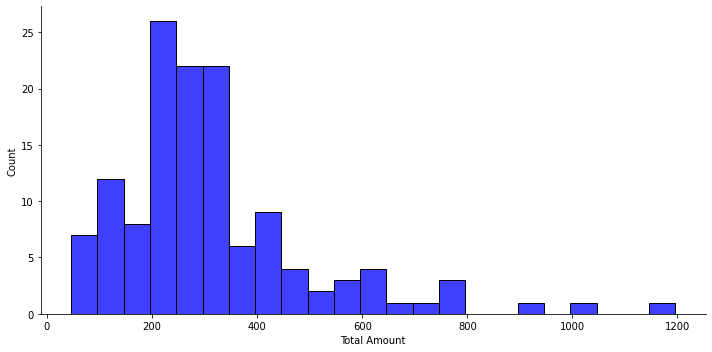

In [ ]:
#https://seaborn.pydata.org/tutorial/distributions.html

sns.displot(df33, x='Total Amount', kind='hist', aspect=2,color= 'blue',binwidth=50)

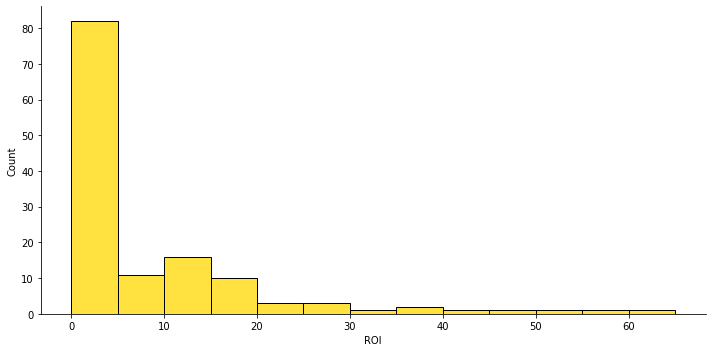

In [ ]:
sns.displot(df33, x='ROI', kind='hist', aspect=2,color= 'gold',binwidth=5)

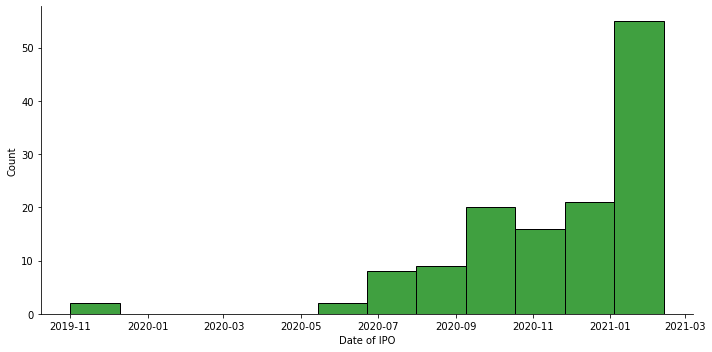

In [ ]:
sns.displot(df33, x='Date of IPO', kind='hist', aspect=2,color= 'Green');

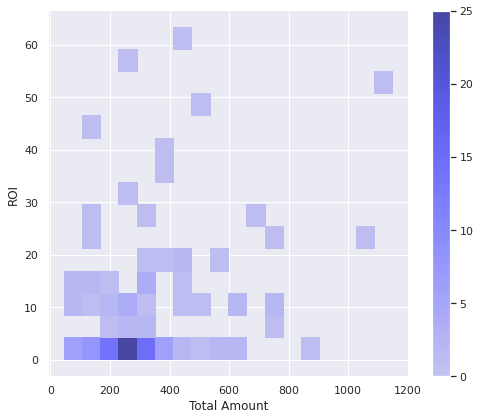

In [ ]:
sns.set(style='darkgrid')
sns.displot(df33, x='Total Amount', y='ROI', kind='hist',cbar=True,height=6, aspect=1.2,color= 'blue')

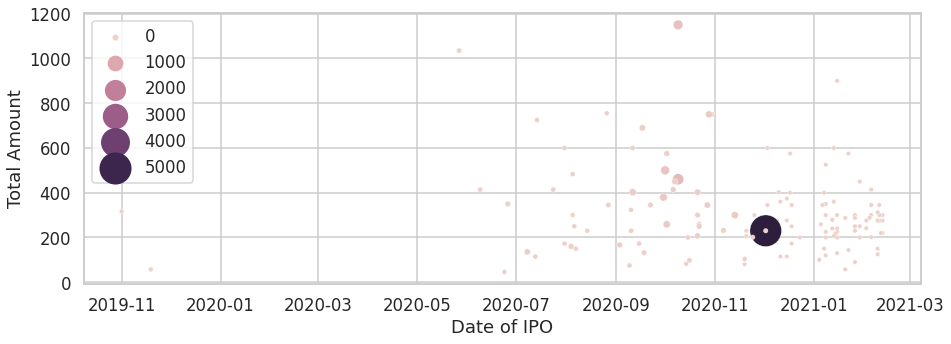

In [ ]:
#sns.scatterplot(data=df33, x="Date of IPO",y="Total Amount", hue='ROI',size="ROI", sizes=(20,200))

#sns.set_context('talk')
#sns.set_palette(['green'])
plt.figure(figsize=(15,5))
sns.set(style='whitegrid',context='talk',palette='rainbow')
sns.scatterplot(data=df33, x="Date of IPO",y="Total Amount", hue='ARR',size="ARR", sizes=(20,1000))
#sns.scatterplot(data=df33, x="Date of IPO",y="Total Amount", hue='ARR')
plt.legend(loc='upper left');

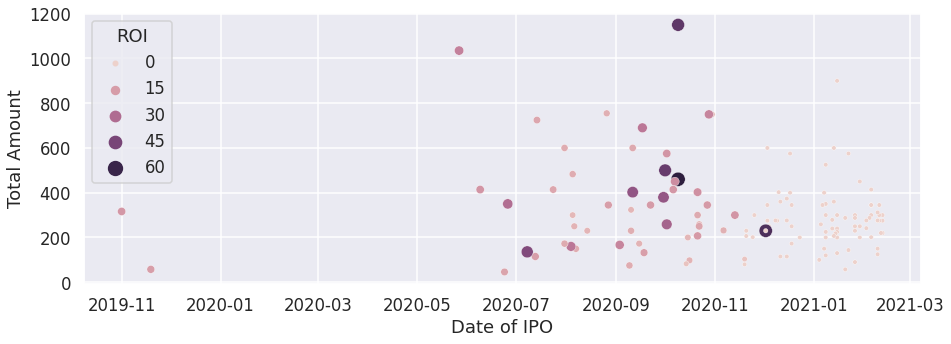

In [ ]:
plt.figure(figsize=(15,5))
sns.set(style='darkgrid',context='talk',palette='rainbow')

sns.scatterplot(data=df33, x="Date of IPO",y="Total Amount", hue='ROI',size="ROI", sizes=(20,200))

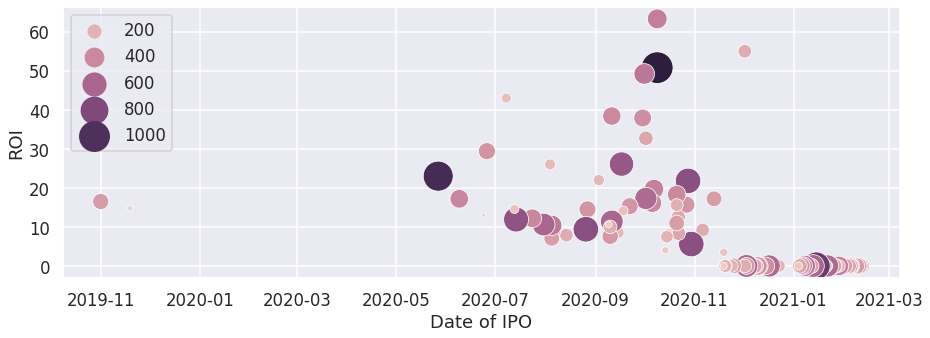

In [ ]:
plt.figure(figsize=(15,5))
sns.set(style='darkgrid',context='talk',palette='rainbow')

sns.scatterplot(data=df33, x="Date of IPO",y="ROI", hue='Total Amount',size="Total Amount", sizes=(20,1000))
plt.legend(loc='upper left');

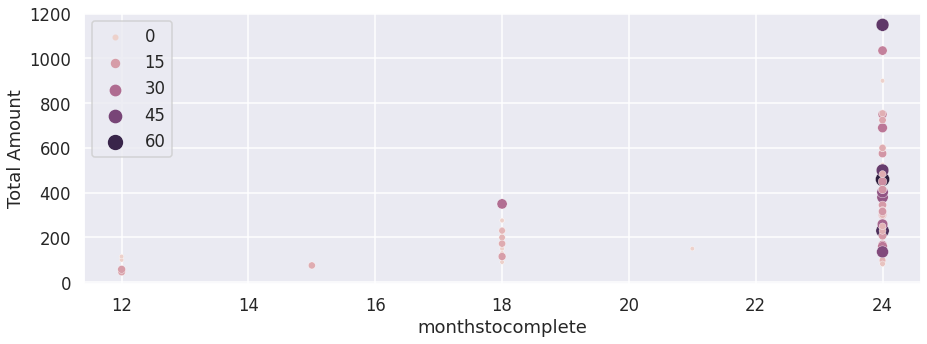

In [ ]:
# Months to Complete vs ROI, Amount
plt.figure(figsize=(15,5))
sns.scatterplot(data=df33, x="monthstocomplete",y="Total Amount", hue='ROI',size="ROI", sizes=(20,200))
plt.legend(loc='upper left');

All SPAC's

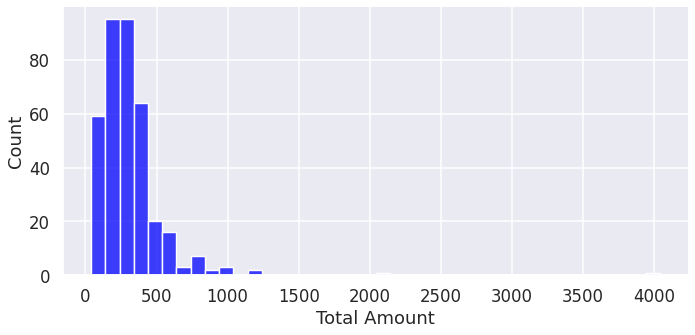

In [ ]:
sns.displot(df3, x='Total Amount', kind='hist', aspect=2,color= 'Blue',binwidth=100)

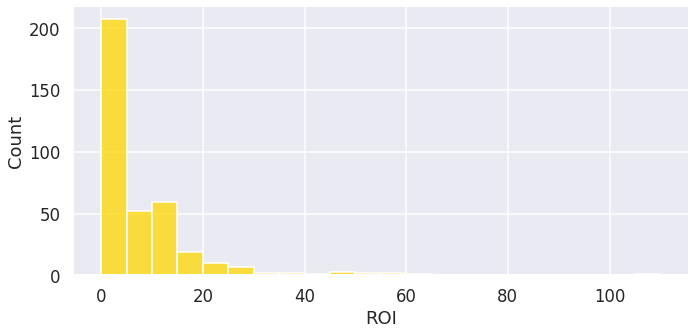

In [ ]:
sns.displot(df3, x='ROI', kind='hist', aspect=2,color= 'gold',binwidth=5)

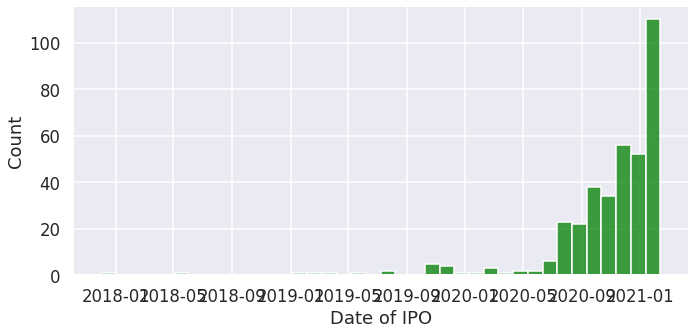

In [ ]:
sns.displot(df3, x='Date of IPO', kind='hist', aspect=2,color= 'Green')

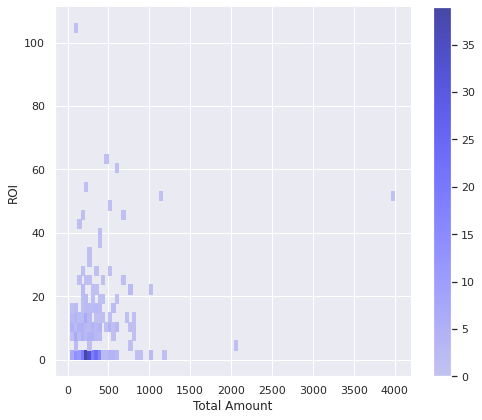

In [ ]:
sns.set(style='darkgrid')
sns.displot(df3, x='Total Amount', y='ROI', kind='hist',cbar=True,height=6, aspect=1.2,color= 'blue')

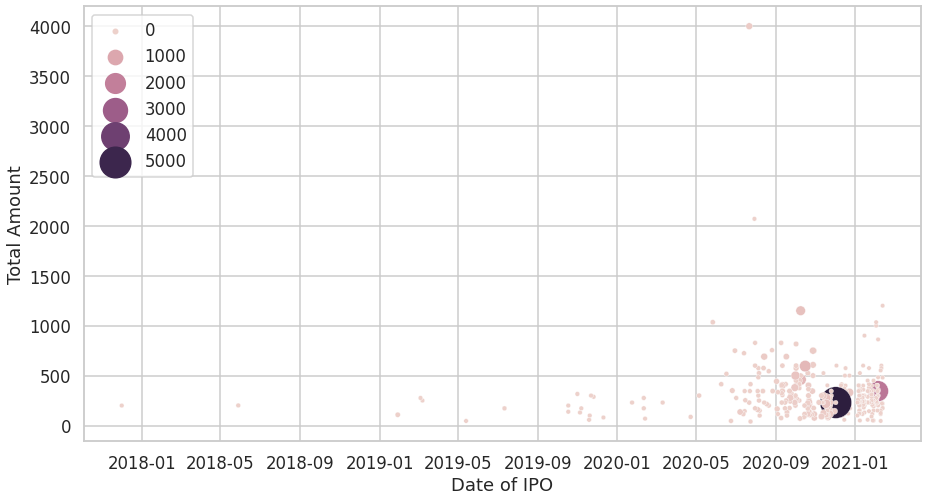

In [ ]:
#sns.scatterplot(data=df3, x="Date of IPO",y="Total Amount", hue='ROI',size="ROI", sizes=(20,200))

#sns.set_context('talk')
#sns.set_palette(['green'])
plt.figure(figsize=(15,8))
sns.set(style='whitegrid',context='talk',palette='rainbow')
sns.scatterplot(data=df3, x="Date of IPO",y="Total Amount", hue='ARR',size="ARR", sizes=(20,1000))
#sns.scatterplot(data=df3, x="Date of IPO",y="Total Amount", hue='ARR')
plt.legend(loc='upper left');

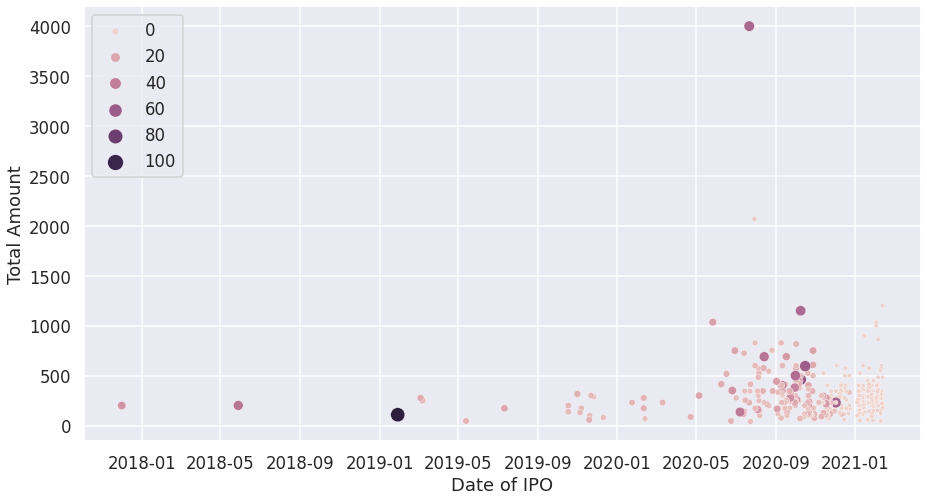

In [ ]:
plt.figure(figsize=(15,8))
sns.set(style='darkgrid',context='talk',palette='rainbow')

sns.scatterplot(data=df3, x="Date of IPO",y="Total Amount", hue='ROI',size="ROI", sizes=(20,200))
plt.legend(loc='upper left');

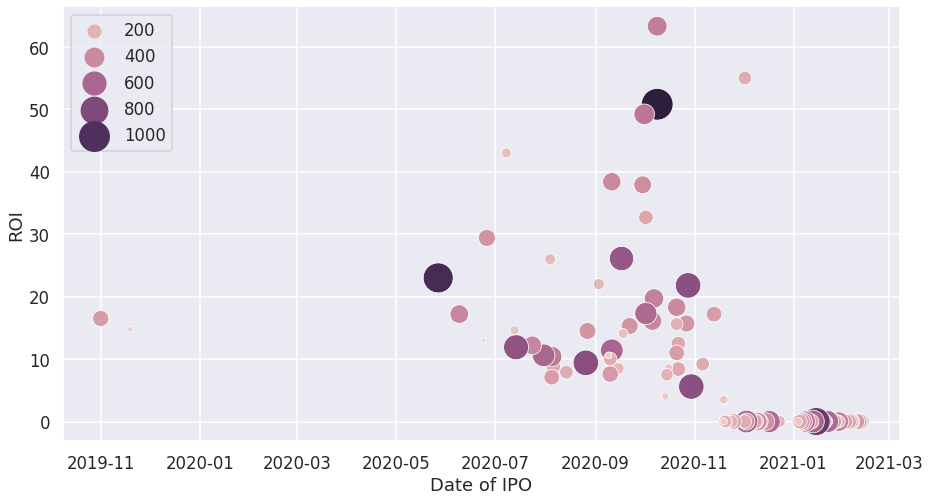

In [ ]:
plt.figure(figsize=(15,8))
sns.set(style='darkgrid',context='talk',palette='rainbow')

sns.scatterplot(data=df33, x="Date of IPO",y="ROI", hue='Total Amount',size="Total Amount", sizes=(20,1000))
plt.legend(loc='upper left');

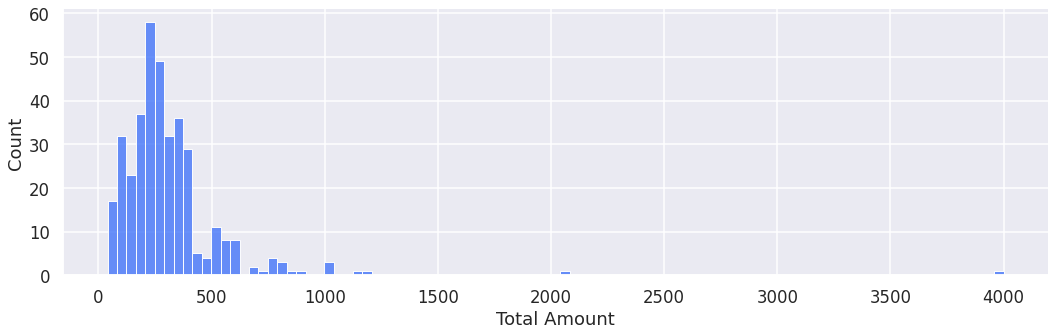

In [ ]:

sns.displot(df3, x='Total Amount', kind='hist', aspect=3)

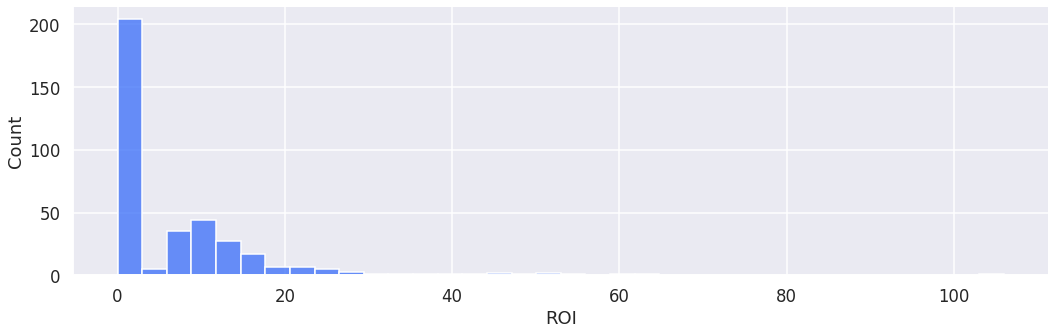

In [ ]:

sns.displot(df3, x='ROI',kind='hist',aspect=3)

# Legal Counsel Analysis

In [ ]:
df3.lawyerissuerscounsel.nunique()

55

In [ ]:
df3.underwritercounsel.nunique()

30

In [ ]:
df3[df3['lawyerissuerscounsel'].str.contains ('Ellenoff')].Name.count()

72

In [ ]:
df3[df3['lawyerissuerscounsel'].str.contains ('Baker')].Name.count()

0

In [ ]:
df3[df3['underwritercounsel'].str.contains ('Ellenoff')].Name.count()

38

In [ ]:
df3[df3['underwritercounsel'].str.contains ('Baker')].Name.count()

0

In [ ]:
df3[df3['lawyerissuerscounsel'].str.contains ('White')].Name.count()

25

# Announced Targets

In [ ]:
df4.head()

,Date of IPO,Name,Symbol,ROI,var 2,ARR,heldintrustperunit,heldintrust,monthstocomplete,warrantsinclinunit,warrant,rights,unit,total,impliedenterprisevalue,right,underwriter,additionalterms,lawyerissuerscounsel,underwritercounsel,comanagers,industry,cashorcashlessredemption,feesupfrontdeferred,businesscombinationrecorddate,businesscombinationshareholdervotedate,ending_trust_ball,implied_cash_per_share,completiondeadlinedate,singlespacsharetext,singlespacexerciseprice,singlespacredemptionprice,completedsymbolwarrant,completedsymbolcommon
0,2020-12-11,"Gores Holdings VI, Inc.",GHVI,73.4,5.45,1999.0,10.0,100,24,1/5,GHVIW,NaN,GHVIU,345.00,$2.26 billion,NaN,"Deutsche Bank, Morgan Stanley",1. Limitation on redemption rights: 20%,"Weil, Gotshal & Manges LLP",Ropes & Gray LLP,NaN,General/ Broad,Mgmt's Discretion,2.0%/3.5%,TBD,TBD,345070182,10.0,2022-12-15,1 Class A Common Stock,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
1,2020-12-09,Nebula Caravel Acquisition Corp.,NEBC,14.2,5.29,103.5,10.0,100,24,1/5,NEBCW,NaN,NEBCU,275.00,$1.35 billion,NaN,"Deutsche Bank, William Blair, Stifel, Nicolaus...",1. Crescent Term: $9.20 2. Limitation on redem...,Ellenoff Grossman & Schole LLP,Davis Polk & Wardwell LLP,"Academy Securities, Blaylock Van, Loop Capital...",Technology,Mgmt's Discretion,2.0%/3.5%,TBD,TBD,275057637,10.0,2022-12-11,1 Share Class A Common Stock,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
2,2020-11-25,Forest Road Acquisition Corporation,FRX,22.1,4.40,143.5,10.0,100,24,1/3,FRX.WS,NaN,FRX.U,300.00,$2.9 billion,NaN,Cantor Fitzgerald,1. Crescent Term: $9.20 2. Limitation on redem...,Ellenoff Grossman & Schole LLP,Graubard Miller,Guggenheim Securities,TMT,Mgmt's Discretion,2.0%/3.5%,TBD,TBD,300075822,10.0,2022-11-27,1 Class A Common Share,11.5,Cash/Cashless: $18.00,NaN,NaN
3,2020-11-25,Spartan Acquisition Corporation II,SPRQ,42.1,5.45,576.8,10.0,100,24,1/2,SPRQ.WS,NaN,SPRQ.U,345.00,$1.267 billion,NaN,"Citigroup, Credit Suisse, Cowen and Company, M...",1. Crescent Term: None 2. Limitation on redemp...,Vinson & Elkins L.L.P.,White & Case LLP,"TD Securities, MUFG, Siebert Williams Shank",Energy,Mgmt's Discretion,2.0%/3.5%,TBD,TBD,345071245,10.0,2022-11-27,1 Class A Common Stock,11.5,Cash/Cashless: $18.00 Shares: $10.00,NaN,NaN
4,2020-11-24,10X Capital Venture Acquisition Corporation,VCVC,40.8,4.35,350.3,10.0,100,18,1/2,VCVCW,NaN,VCVCU,201.25,$3.1 billion,NaN,Wells Fargo Securities,1. Crescent term: $9.20 2. Limitation on redem...,White & Case LLP,Ellenoff Grossman & Schole LLP,NaN,Tech,Mgmt's Discretion,2.0%/3.5%,TBD,TBD,201301484,10.0,2022-05-27,1 Class A Common Stock,11.5,Cash/Cashless: $18.00,NaN,NaN


In [ ]:
df4.columns

Index(['Date of IPO', 'Name', 'Symbol', 'ROI', 'var 2', 'ARR',
       'heldintrustperunit', 'heldintrust', 'monthstocomplete',
       'warrantsinclinunit', 'warrant', 'rights', 'unit', 'total',
       'impliedenterprisevalue', 'right', 'underwriter', 'additionalterms',
       'lawyerissuerscounsel', 'underwritercounsel', 'comanagers', 'industry',
       'cashorcashlessredemption', 'feesupfrontdeferred',
       'businesscombinationrecorddate',
       'businesscombinationshareholdervotedate', 'ending_trust_ball',
       'implied_cash_per_share', 'completiondeadlinedate',
       'singlespacsharetext', 'singlespacexerciseprice',
       'singlespacredemptionprice', 'completedsymbolwarrant',
       'completedsymbolcommon'],
      dtype='object')

In [ ]:

# showing error

#df33[df33['ROI']>20 ].sort_values(by='ROI',ascending=False).Symbol


#df4[['Symbol','Date of IPO','Total Amount','ROI','businesscombinationrecorddate', 'businesscombinationshareholdervotedate']].sort_values(by='Date of IPO',ascending=False)